# <img style="float: left; padding-right: 20px; width: 200px" src="https://raw.githubusercontent.com/raxlab/imt2200-data/main/media/logo.jpg">  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2025-S2**<br>
**Profesor:** Rodrigo A. Carrasco <br>
**Alumno: Israel Pino Saavedra**

---
# <h1><center>Tarea 03: Exploración de datos </center></h1>

**Fecha de Entrega:** 28 de octubre de 2025, a las 23:59.

**Fecha de publicación**: 14 de octubre de 2025.

**Formato de entrega:** Notebook ejecutado y comentado (`.ipynb`) en el módulo de Tarea 03 habilitado en Canvas.

---

# <h1><center>Respuesta 2.1 </center></h1>


Investigue sobre este índice y responda de manera concisa: 
* ¿En qué consiste el IVM? ¿Qué rango de valores toma y qué significan? 
* ¿Cómo se obtiene el IVM de un establecimiento educacional?

**Respuesta**:  EL IVM es una medida generada a partir de la correlación de variables que representan las dimensiones o factores más relevantes de un concepto de vulnerabilidad no observable, según la trayectoria escolar del estudiante. El IVM fue desarrollado entre los años 2015 y 2016 mediante un convenio entre JUNAEB y Pontificia Universidad Católica de Chile.  Los rangos de valores van de 0 a 100 , donde 100 expresa la mayor vulnerabilidad posible, se puede expresar en categorias bajo, medio, alto y muy alto.

Se obtiene anualmente mediante una Encuesta de vulnerabilidad aplicado a todos los hogares de estudiantes que cursan prekínder, kínder, 1° básico, 5° básico y I° Medio en establecimientos que reciben subvención del Estado de Chile. Además, se obtiene información del Registro de Padres, Madres y Embarazadas y del Mapa Nutricional

Por otra parte, se consideran otros registros administrativos y estadísticas públicas que posee el Estado, provenientes de las siguientes instituciones:
Ministerio de Educación (MINEDUC)
Ministerio de Desarrollo Social (MDS)
Servicio de Registro Civil e Identificación (SRCeI)
Fondo Nacional de Salud (FONASA)
Servicio Nacional de Menores (SENAME)
Sistema Nacional de Información Municipal (SINIM)
Instituto Nacional de Estadísticas (INE)


---

In [1]:
#Import cell
import geopandas as gpd
import pandas as pd
from IPython.display import Image, display
import matplotlib.pyplot as plt


# <h1><center>Respuesta 3.1 Datos de establecimientos (0.5 puntos) </center></h1>

Cargue los datos de los establecimientos en cuatro DataFrames distintos.


In [2]:
# @title Respuesta 3.1

nombre_archivo = "IVM_Establecimientos_2025-2.xlsx"

dfP= pd.read_excel(
    nombre_archivo,
    sheet_name="Parvularia")

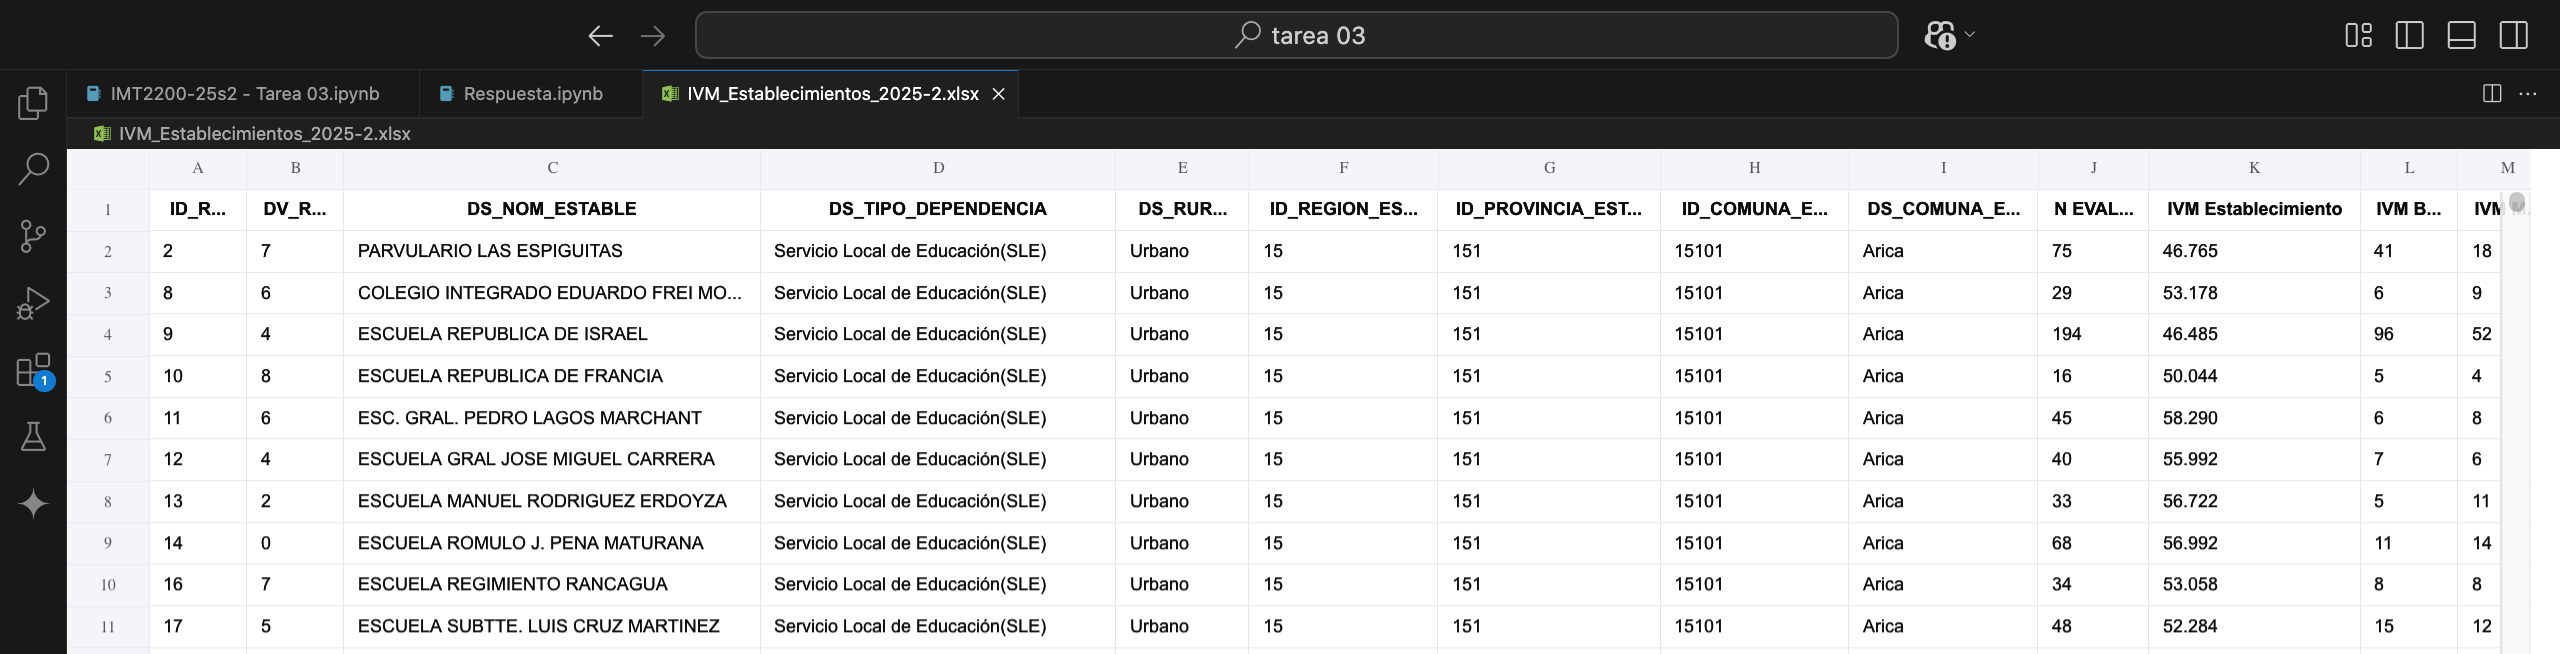

,ID_RBD,DV_RBD,DS_NOM_ESTABLE,DS_TIPO_DEPENDENCIA,DS_RURALIDAD,ID_REGION_ESTABLE,ID_PROVINCIA_ESTABLE,ID_COMUNA_ESTABLE,DS_COMUNA_ESTABLE,N EVALUADO,...,IVM Bajo,IVM Medio,IVM Alto,IVM Muy Alto,IVM Salud,IVM CSE Familiar,IVM Estimulación y Apoyo,IVM Familia,IVM CSE Comunal,IVM Derechos
0,2,7,PARVULARIO LAS ESPIGUITAS,Servicio Local de Educación(SLE),Urbano,15,151,15101,Arica,75,...,41,18,10,6,24.494117,33.111049,34.732329,71.339647,13.929126,28.934927
1,8,6,COLEGIO INTEGRADO EDUARDO FREI MONTALVA,Servicio Local de Educación(SLE),Urbano,15,151,15101,Arica,29,...,6,9,8,6,33.627244,44.572505,44.160840,70.761131,13.941963,25.186786
2,9,4,ESCUELA REPUBLICA DE ISRAEL,Servicio Local de Educación(SLE),Urbano,15,151,15101,Arica,194,...,96,52,36,10,27.859852,35.035981,39.835498,70.725139,14.035447,26.995586
3,10,8,ESCUELA REPUBLICA DE FRANCIA,Servicio Local de Educación(SLE),Urbano,15,151,15101,Arica,16,...,5,4,6,1,44.770271,43.530614,51.977467,71.969637,14.231790,29.929321
4,11,6,ESC. GRAL. PEDRO LAGOS MARCHANT,Servicio Local de Educación(SLE),Urbano,15,151,15101,Arica,45,...,6,8,11,20,27.819437,50.101269,46.141877,67.164913,13.958703,34.009262


In [3]:
#Verifico que corresponda el data frame con la visualización del archivo Excel
nombre_imagen= "Revision_tabla.png"


display(Image(filename=nombre_imagen))

# Visualizo si hay correspondencia
dfP.head()

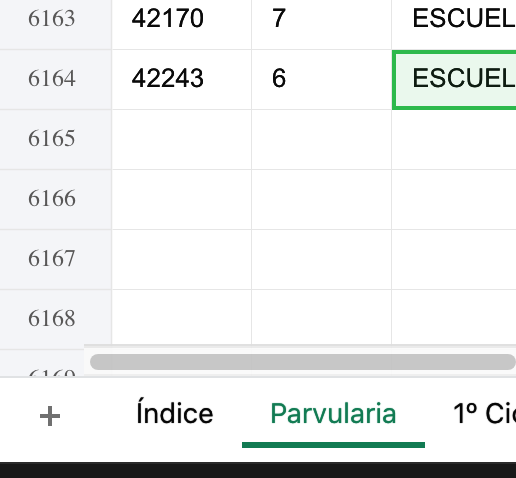

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6163 entries, 0 to 6162
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID_RBD                    6163 non-null   int64  
 1   DV_RBD                    6163 non-null   int64  
 2   DS_NOM_ESTABLE            6163 non-null   object 
 3   DS_TIPO_DEPENDENCIA       6163 non-null   object 
 4   DS_RURALIDAD              6163 non-null   object 
 5   ID_REGION_ESTABLE         6163 non-null   int64  
 6   ID_PROVINCIA_ESTABLE      6163 non-null   int64  
 7   ID_COMUNA_ESTABLE         6163 non-null   int64  
 8   DS_COMUNA_ESTABLE         6163 non-null   object 
 9   N EVALUADO                6163 non-null   int64  
 10  IVM Establecimiento       6163 non-null   float64
 11  IVM Bajo                  6163 non-null   int64  
 12  IVM Medio                 6163 non-null   int64  
 13  IVM Alto                  6163 non-null   int64  
 14  IVM Muy 

In [4]:
nombre_imagen2="Total filas data original.png"
from IPython.display import Image, display
display(Image(filename=nombre_imagen2))

# Visualizo si hay correspondencia
dfP.info()

In [5]:
#Procedo a hacer lo mismo con cada pestaña de excel o nivel

nombre_archivo = "IVM_Establecimientos_2025-2.xlsx"

df1 = pd.read_excel(
    nombre_archivo,
    sheet_name="1º Ciclo Básico")

df2 = pd.read_excel(
    nombre_archivo,
    sheet_name="2º Ciclo Básico")

dfM = pd.read_excel(
    nombre_archivo,
    sheet_name="Media")


**Proceso de limpieza (manejo de valores nulos, duplicados, inválidos, transformación de tipos de datos, etc)** 

In [6]:
#Reviso los nulos del primer nivel
dfP.isnull().sum()

ID_RBD                      0
DV_RBD                      0
DS_NOM_ESTABLE              0
DS_TIPO_DEPENDENCIA         0
DS_RURALIDAD                0
ID_REGION_ESTABLE           0
ID_PROVINCIA_ESTABLE        0
ID_COMUNA_ESTABLE           0
DS_COMUNA_ESTABLE           0
N EVALUADO                  0
IVM Establecimiento         0
IVM Bajo                    0
IVM Medio                   0
IVM Alto                    0
IVM Muy Alto                0
IVM Salud                   0
IVM CSE Familiar            0
IVM Estimulación y Apoyo    0
IVM Familia                 0
IVM CSE Comunal             0
IVM Derechos                0
dtype: int64

In [7]:
#los nulos de las demas
df1.isnull().sum()

ID_RBD                  0
DV_RBD                  0
DS_NOM_ESTABLE          0
DS_TIPO_DEPENDENCIA     0
DS_RURALIDAD            0
ID_REGION_ESTABLE       0
ID_PROVINCIA_ESTABLE    0
ID_COMUNA_ESTABLE       0
DS_COMUNA_ESTABLE       0
N EVALUADO              0
IVM Establecimiento     0
IVM Bajo                0
IVM Medio               0
IVM Alto                0
IVM Muy Alto            0
IVM Salud               0
IVM Discapacidad        0
IVM Educación           0
IVM Habitabilidad       0
IVM Familiar            0
IVM Participación       0
IVM CSE Familia         0
IVM CSE Comunal         0
dtype: int64

In [8]:
df2.isnull().sum()

ID_RBD                  0
DV_RBD                  0
DS_NOM_ESTABLE          0
DS_TIPO_DEPENDENCIA     0
DS_RURALIDAD            0
ID_REGION_ESTABLE       0
ID_PROVINCIA_ESTABLE    0
ID_COMUNA_ESTABLE       0
DS_COMUNA_ESTABLE       0
N EVALUADO              0
IVM Establecimiento     0
IVM Bajo                0
IVM Medio               0
IVM Alto                0
IVM Muy Alto            0
dtype: int64

In [9]:
dfM.isnull().sum()

ID_RBD                  0
DV_RBD                  0
DS_NOM_ESTABLE          0
DS_TIPO_DEPENDENCIA     0
DS_RURALIDAD            0
ID_REGION_ESTABLE       0
ID_PROVINCIA_ESTABLE    0
ID_COMUNA_ESTABLE       0
DS_COMUNA_ESTABLE       0
N EVALUADO              0
IVM Establecimiento     0
IVM Bajo                0
IVM Medio               0
IVM Alto                0
IVM Muy Alto            0
dtype: int64

In [10]:
#Conclusion: no hay valores nulos

Verifico valores duplicados

In [11]:
dfP.duplicated().sum()


np.int64(0)

In [12]:
df1.duplicated().sum()

np.int64(0)

In [13]:
df2.duplicated().sum()


np.int64(0)

In [14]:
dfM.duplicated().sum()

np.int64(0)

In [15]:
#Conclusion: no hay valores duplicados

**Verifico valores inválidos**

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7082 entries, 0 to 7081
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_RBD                7082 non-null   int64  
 1   DV_RBD                7082 non-null   int64  
 2   DS_NOM_ESTABLE        7082 non-null   object 
 3   DS_TIPO_DEPENDENCIA   7082 non-null   object 
 4   DS_RURALIDAD          7082 non-null   object 
 5   ID_REGION_ESTABLE     7082 non-null   int64  
 6   ID_PROVINCIA_ESTABLE  7082 non-null   int64  
 7   ID_COMUNA_ESTABLE     7082 non-null   int64  
 8   DS_COMUNA_ESTABLE     7082 non-null   object 
 9   N EVALUADO            7082 non-null   int64  
 10  IVM Establecimiento   7082 non-null   float64
 11  IVM Bajo              7082 non-null   int64  
 12  IVM Medio             7082 non-null   int64  
 13  IVM Alto              7082 non-null   int64  
 14  IVM Muy Alto          7082 non-null   int64  
 15  IVM Salud            

In [17]:
df1.sample(15)

,ID_RBD,DV_RBD,DS_NOM_ESTABLE,DS_TIPO_DEPENDENCIA,DS_RURALIDAD,ID_REGION_ESTABLE,ID_PROVINCIA_ESTABLE,ID_COMUNA_ESTABLE,DS_COMUNA_ESTABLE,N EVALUADO,...,IVM Alto,IVM Muy Alto,IVM Salud,IVM Discapacidad,IVM Educación,IVM Habitabilidad,IVM Familiar,IVM Participación,IVM CSE Familia,IVM CSE Comunal
6450,24338,8,COLEGIO LUTERANO,Particular Subvencionado,Urbano,12,121,12101,Punta Arenas,120,...,29,17,51.264219,0.941485,11.081816,19.558783,30.948209,1.465741,38.864251,7.946410
1240,2347,7,ESC.PARROCO M.BUSTAMANTE,Corporación Municipal,Rural,6,61,6117,San Vicente,49,...,7,36,43.428176,2.305677,17.780284,25.151483,37.728742,27.396831,59.664571,26.609444
4143,8408,5,ESC. BASICA HERNAN MERINO CORREA,Servicio Local de Educación(SLE),Rural,11,113,11301,Cochrane,205,...,54,53,50.249701,1.876749,9.889644,21.233485,31.066031,1.763656,50.202143,27.021640
216,431,6,LICEO SAGRADO CORAZÓN,Particular Subvencionado,Urbano,3,31,3101,Copiapó,252,...,53,41,41.876689,10.883967,13.084581,20.207221,33.468471,1.818876,48.878953,11.086909
6743,25718,2,COLEGIO PART. LOS ANGELES SANTIAGO DE SAN MIG,Particular Subvencionado,Urbano,13,131,13130,San Miguel,87,...,17,12,46.529338,7.168599,13.630508,19.616347,28.559531,3.070009,42.284673,5.560625
4416,9418,8,ESCUELA LA VICTORIA,Servicio Local de Educación(SLE),Urbano,13,131,13121,Pedro Aguirre Cerda,94,...,16,60,41.118158,7.398123,14.056738,21.872140,37.776794,30.462472,57.475071,8.070312
2084,3948,9,ESCUELA SAN MIGUEL DE ITATA,Municipal DAEM,Rural,16,161,16109,Yungay,20,...,4,5,34.616856,1.412227,15.428768,22.052471,32.527431,0.325720,62.146044,26.141635
1625,3038,4,ESCUELA LA CHISPA,Municipal DAEM,Rural,7,71,7108,Río Claro,32,...,6,3,29.299855,0.882642,14.603227,21.883364,26.555362,1.974738,59.170878,39.222093
4924,10522,8,ESCUELA BASICA G-N°643 SAN JUAN DE PIRQUE,Corporación Municipal,Rural,13,132,13202,Pirque,83,...,27,10,46.746860,4.764139,9.571956,20.979414,28.885847,3.040491,50.294642,26.046637
366,690,4,LICEO BICENTENARIO DE EXCELENCIA COLEGIO ANTON...,Particular Subvencionado,Urbano,4,41,4106,Vicuña,270,...,59,42,47.640761,13.274009,10.752808,20.040504,34.047994,0.465100,47.781182,27.606901


In [18]:
#Busco valores extraños en una columna
#asi encuentro los datos unicos de cada columna
dfP['DS_RURALIDAD'].unique()


array(['Urbano', 'Rural'], dtype=object)

In [19]:
dfP.columns

Index(['ID_RBD', 'DV_RBD', 'DS_NOM_ESTABLE', 'DS_TIPO_DEPENDENCIA',
       'DS_RURALIDAD', 'ID_REGION_ESTABLE', 'ID_PROVINCIA_ESTABLE',
       'ID_COMUNA_ESTABLE', 'DS_COMUNA_ESTABLE', 'N EVALUADO',
       'IVM Establecimiento', 'IVM Bajo', 'IVM Medio', 'IVM Alto',
       'IVM Muy Alto', 'IVM Salud', 'IVM CSE Familiar',
       'IVM Estimulación y Apoyo', 'IVM Familia', 'IVM CSE Comunal',
       'IVM Derechos'],
      dtype='object')

In [20]:
#EXPLORANDO DATOS

lista_columnas= ['ID_RBD', 'DV_RBD', 'DS_NOM_ESTABLE', 'DS_TIPO_DEPENDENCIA',
       'DS_RURALIDAD', 'ID_REGION_ESTABLE', 'ID_PROVINCIA_ESTABLE',
       'ID_COMUNA_ESTABLE', 'DS_COMUNA_ESTABLE', 'N EVALUADO',
       'IVM Establecimiento', 'IVM Bajo', 'IVM Medio', 'IVM Alto',
       'IVM Muy Alto', 'IVM Salud', 'IVM CSE Familiar',
       'IVM Estimulación y Apoyo', 'IVM Familia', 'IVM CSE Comunal',
       'IVM Derechos']

for columna in lista_columnas:
    print(f"Valores únicos en la columna {columna}:")
    print(dfP[columna].unique())
    print("\n")

#Si observamos el output no truncado, obtenemos todos los datos no repetidos por columna o datos únicos

Valores únicos en la columna ID_RBD:
[    2     8     9 ... 42153 42170 42243]


Valores únicos en la columna DV_RBD:
[7 6 4 8 2 0 5 3 1 9]


Valores únicos en la columna DS_NOM_ESTABLE:
['PARVULARIO LAS ESPIGUITAS' 'COLEGIO INTEGRADO EDUARDO FREI MONTALVA'
 'ESCUELA REPUBLICA DE ISRAEL' ... 'ESCUELA ESPECIAL DE LENGUAJE IERUBA'
 'ESCUELA ESPECIAL DE LENGUAJE QISPI KAY'
 'ESCUELA ESPECIAL DE LENGUAJE PLAYGARDEN']


Valores únicos en la columna DS_TIPO_DEPENDENCIA:
['Servicio Local de Educación(SLE)' 'Particular Subvencionado'
 'Municipal DAEM' 'Corporación Municipal']


Valores únicos en la columna DS_RURALIDAD:
['Urbano' 'Rural']


Valores únicos en la columna ID_REGION_ESTABLE:
[15  1  2  3  4  5  6  7 16  8  9 14 10 11 12 13]


Valores únicos en la columna ID_PROVINCIA_ESTABLE:
[151 152  11  14  23  22  21  32  31  33  41  43  42  54  53  57  55  58
  51  56  61  63  62  73  71  74  72 161 163 162  83  81  82  92  91 141
 142 103 101 102 104 111 112 114 113 124 121 123 122 131 135 1

In [21]:
"""Podemos ver que por ejemplo , los valores de la columna "ID_REGION_ESTABLE" es razonable, son las 16 regiones

Valores únicos en la columna "ID_REGION_ESTABLE":
[15  1  2  3  4  5  6  7 16  8  9 14 10 11 12 13]"""

'Podemos ver que por ejemplo , los valores de la columna "ID_REGION_ESTABLE" es razonable, son las 16 regiones\n\nValores únicos en la columna "ID_REGION_ESTABLE":\n[15  1  2  3  4  5  6  7 16  8  9 14 10 11 12 13]'

In [22]:
#Ahora lo hago con cada df1 (nivel 1º ciclo basico)
lista_columnas_df1=df1.columns
for columna in lista_columnas_df1:
    print(f"Valores únicos en la columna {columna}:")
    print(df1[columna].unique())
    print("\n")

Valores únicos en la columna ID_RBD:
[    5     8     9 ... 42154 42254 42256]


Valores únicos en la columna DV_RBD:
[1 6 4 8 2 0 9 7 5 3]


Valores únicos en la columna DS_NOM_ESTABLE:
['JOVINA NARANJO FERNANDEZ' 'COLEGIO INTEGRADO EDUARDO FREI MONTALVA'
 'ESCUELA REPUBLICA DE ISRAEL' ... 'ESCUELA HOSPITALARIA ENTRE VALLES'
 'ESCUELA HOSPITALARIA DE LONCOCHE' 'ESCUELA HOSPITALARIA DE LONQUIMAY']


Valores únicos en la columna DS_TIPO_DEPENDENCIA:
['Servicio Local de Educación(SLE)' 'Particular Subvencionado'
 'Municipal DAEM' 'Corporación Municipal'
 'Administración Delegada (C. P. 3166)']


Valores únicos en la columna DS_RURALIDAD:
['Urbano' 'Rural']


Valores únicos en la columna ID_REGION_ESTABLE:
[15  1  2  3  4  5  6  7 16  8  9 14 10 11 12 13]


Valores únicos en la columna ID_PROVINCIA_ESTABLE:
[151 152  11  14  23  22  21  32  31  33  41  43  42  54  53  57  55  58
  51  56  52  61  63  62  73  71  74  72 161 163  83 162  81  82  92  91
 141 142 103 101 102 104 111 112 114 1

In [23]:
#Ahora lo hago con DF2  (nivel 2º ciclo basico)
lista_columnas_df2=df2.columns
for columna in lista_columnas_df2:
    print(f"Valores únicos en la columna {columna}:")
    print(df2[columna].unique())
    print("\n")

Valores únicos en la columna ID_RBD:
[    5     8     9 ... 42130 42254 42256]


Valores únicos en la columna DV_RBD:
[1 6 4 8 2 0 9 7 5 3]


Valores únicos en la columna DS_NOM_ESTABLE:


['JOVINA NARANJO FERNANDEZ' 'COLEGIO INTEGRADO EDUARDO FREI MONTALVA'
 'ESCUELA REPUBLICA DE ISRAEL' ...
 'ESCUELA HOSPITALARIA PROVINCIA CORDILLERA PUENTE ALTO'
 'ESCUELA HOSPITALARIA DE LONCOCHE' 'ESCUELA HOSPITALARIA DE LONQUIMAY']


Valores únicos en la columna DS_TIPO_DEPENDENCIA:
['Servicio Local de Educación(SLE)' 'Particular Subvencionado'
 'Administración Delegada (C. P. 3166)' 'Municipal DAEM'
 'Corporación Municipal']


Valores únicos en la columna DS_RURALIDAD:
['Urbano' 'Rural']


Valores únicos en la columna ID_REGION_ESTABLE:
[15  1  2  3  4  5  6  7 16  8  9 14 10 11 12 13]


Valores únicos en la columna ID_PROVINCIA_ESTABLE:
[151 152  11  14  23  22  21  32  31  33  41  43  42  54  53  57  55  58
  51  56  61  63  62  73  71  74  72 161 163 162  83  81  82  92  91 141
 142 103 101 102 104 111 112 114 113 124 121 123 122 131 134 132 133 136
 135  52]


Valores únicos en la columna ID_COMUNA_ESTABLE:
[15101 15102 15201 15202  1101  1404  1402  1403  1405  1401  2301  230

In [24]:
#por ultimo con dfM 
lista_columnas_dfM=dfM.columns
for columna in lista_columnas_dfM:
    print(f"Valores únicos en la columna {columna}:")
    print(dfM[columna].unique())
    print("\n")

Valores únicos en la columna ID_RBD:
[    1     4     5 ... 42130 42254 42256]


Valores únicos en la columna DV_RBD:
[9 3 1 8 6 0 7 4 2 5]


Valores únicos en la columna DS_NOM_ESTABLE:
['LICEO POLITECNICO ARICA' 'LICEO OCTAVIO PALMA PEREZ'
 'JOVINA NARANJO FERNANDEZ' ...
 'ESCUELA HOSPITALARIA PROVINCIA CORDILLERA PUENTE ALTO'
 'ESCUELA HOSPITALARIA DE LONCOCHE' 'ESCUELA HOSPITALARIA DE LONQUIMAY']


Valores únicos en la columna DS_TIPO_DEPENDENCIA:
['Servicio Local de Educación(SLE)' 'Particular Subvencionado'
 'Administración Delegada (C. P. 3166)' 'Municipal DAEM'
 'Corporación Municipal']


Valores únicos en la columna DS_RURALIDAD:
['Urbano' 'Rural']


Valores únicos en la columna ID_REGION_ESTABLE:
[15  1  2  3  4  5  6  7 16  8  9 14 10 11 12 13]


Valores únicos en la columna ID_PROVINCIA_ESTABLE:
[151 152  11  14  23  22  21  32  31  33  41  43  42  54  53  57  55  58
  51  56  61  63  62  73  71  74  72 161 163 162  83  81  82  92  91 141
 142 103 101 102 104 111 112 114 11

**Transformación de datos a category**

**Para explorar mejor la tabla y verificar si los tipos de datos están bien, vemos cuantos datos distintos tiene cada columna  y buscamos candidatos para category**

In [25]:
"""datafram sobre el que trabajamos:""" 
"""trabajamos sobre el dfP""" 
dfn= dfP

"""creamos un df del numero de valores unicos de cada columna""" 
lista_columnas_dfn= dfn.columns
dicc_acumulado=[]
for columna in lista_columnas_dfn: 
    dict_nunique_dfn={ 
        "Columna" : columna,
        "Número de valores únicos" : dfn[columna].nunique()}
    dicc_acumulado.append(dict_nunique_dfn) 

df_nunique_dfn=pd.DataFrame(dicc_acumulado)
df_nunique_dfn.head(len(df_nunique_dfn))

,Columna,Número de valores únicos
0,ID_RBD,6163
1,DV_RBD,10
2,DS_NOM_ESTABLE,5773
3,DS_TIPO_DEPENDENCIA,4
4,DS_RURALIDAD,2
5,ID_REGION_ESTABLE,16
6,ID_PROVINCIA_ESTABLE,55
7,ID_COMUNA_ESTABLE,338
8,DS_COMUNA_ESTABLE,338
9,N EVALUADO,217


In [26]:
"""trabajamos sobre df1""" 
dfn= df1

"""creamos un df del numero de valores unicos de cada columna""" 
lista_columnas_dfn= dfn.columns
dicc_acumulado=[]
for columna in lista_columnas_dfn: 
    dict_nunique_dfn={ 
        "Columna" : columna,
        "Número de valores únicos" : dfn[columna].nunique()}
    dicc_acumulado.append(dict_nunique_dfn) 

df_nunique_dfn=pd.DataFrame(dicc_acumulado)
df_nunique_dfn.head(len(df_nunique_dfn))

,Columna,Número de valores únicos
0,ID_RBD,7082
1,DV_RBD,10
2,DS_NOM_ESTABLE,6530
3,DS_TIPO_DEPENDENCIA,5
4,DS_RURALIDAD,2
5,ID_REGION_ESTABLE,16
6,ID_PROVINCIA_ESTABLE,56
7,ID_COMUNA_ESTABLE,345
8,DS_COMUNA_ESTABLE,345
9,N EVALUADO,550


In [27]:
"""trabajamos sobre df2""" 
dfn= df2

"""creamos un df del numero de valores unicos de cada columna""" 
lista_columnas_dfn= dfn.columns
dicc_acumulado=[]
for columna in lista_columnas_dfn: 
    dict_nunique_dfn={ 
        "Columna" : columna,
        "Número de valores únicos" : dfn[columna].nunique()}
    dicc_acumulado.append(dict_nunique_dfn) 

df_nunique_dfn=pd.DataFrame(dicc_acumulado)
df_nunique_dfn.head(len(df_nunique_dfn))

,Columna,Número de valores únicos
0,ID_RBD,5662
1,DV_RBD,10
2,DS_NOM_ESTABLE,5244
3,DS_TIPO_DEPENDENCIA,5
4,DS_RURALIDAD,2
5,ID_REGION_ESTABLE,16
6,ID_PROVINCIA_ESTABLE,56
7,ID_COMUNA_ESTABLE,344
8,DS_COMUNA_ESTABLE,344
9,N EVALUADO,356


In [28]:
"""trabajamos sobre dfM""" 
dfn= dfM

"""creamos un df del numero de valores unicos de cada columna""" 
lista_columnas_dfn= dfn.columns
dicc_acumulado=[]
for columna in lista_columnas_dfn: 
    dict_nunique_dfn={ 
        "Columna" : columna,
        "Número de valores únicos" : dfn[columna].nunique()}
    dicc_acumulado.append(dict_nunique_dfn) 

df_nunique_dfn=pd.DataFrame(dicc_acumulado)
df_nunique_dfn.head(len(df_nunique_dfn))

,Columna,Número de valores únicos
0,ID_RBD,2618
1,DV_RBD,10
2,DS_NOM_ESTABLE,2490
3,DS_TIPO_DEPENDENCIA,5
4,DS_RURALIDAD,2
5,ID_REGION_ESTABLE,16
6,ID_PROVINCIA_ESTABLE,56
7,ID_COMUNA_ESTABLE,335
8,DS_COMUNA_ESTABLE,335
9,N EVALUADO,815


In [29]:
dfP.head(2)

,ID_RBD,DV_RBD,DS_NOM_ESTABLE,DS_TIPO_DEPENDENCIA,DS_RURALIDAD,ID_REGION_ESTABLE,ID_PROVINCIA_ESTABLE,ID_COMUNA_ESTABLE,DS_COMUNA_ESTABLE,N EVALUADO,...,IVM Bajo,IVM Medio,IVM Alto,IVM Muy Alto,IVM Salud,IVM CSE Familiar,IVM Estimulación y Apoyo,IVM Familia,IVM CSE Comunal,IVM Derechos
0,2,7,PARVULARIO LAS ESPIGUITAS,Servicio Local de Educación(SLE),Urbano,15,151,15101,Arica,75,...,41,18,10,6,24.494117,33.111049,34.732329,71.339647,13.929126,28.934927
1,8,6,COLEGIO INTEGRADO EDUARDO FREI MONTALVA,Servicio Local de Educación(SLE),Urbano,15,151,15101,Arica,29,...,6,9,8,6,33.627244,44.572505,44.160840,70.761131,13.941963,25.186786


In [30]:
"""info de dfP""" 
dfP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6163 entries, 0 to 6162
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID_RBD                    6163 non-null   int64  
 1   DV_RBD                    6163 non-null   int64  
 2   DS_NOM_ESTABLE            6163 non-null   object 
 3   DS_TIPO_DEPENDENCIA       6163 non-null   object 
 4   DS_RURALIDAD              6163 non-null   object 
 5   ID_REGION_ESTABLE         6163 non-null   int64  
 6   ID_PROVINCIA_ESTABLE      6163 non-null   int64  
 7   ID_COMUNA_ESTABLE         6163 non-null   int64  
 8   DS_COMUNA_ESTABLE         6163 non-null   object 
 9   N EVALUADO                6163 non-null   int64  
 10  IVM Establecimiento       6163 non-null   float64
 11  IVM Bajo                  6163 non-null   int64  
 12  IVM Medio                 6163 non-null   int64  
 13  IVM Alto                  6163 non-null   int64  
 14  IVM Muy 

In [31]:
"""datafram sobre el que trabajamos:""" 
"""trabajamos sobre el dfP""" 
dfn= dfP

"""Convertimos las columnas categóricas a tipo 'category'"""
lista_columnas=[
    "DV_RBD",
    "DS_TIPO_DEPENDENCIA",
    "DS_RURALIDAD",
    "ID_REGION_ESTABLE",
    "ID_PROVINCIA_ESTABLE",
    "ID_COMUNA_ESTABLE",
    "DS_COMUNA_ESTABLE"
]
for columna in lista_columnas:
    dfn[columna] = dfn[columna].astype("category")
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6163 entries, 0 to 6162
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ID_RBD                    6163 non-null   int64   
 1   DV_RBD                    6163 non-null   category
 2   DS_NOM_ESTABLE            6163 non-null   object  
 3   DS_TIPO_DEPENDENCIA       6163 non-null   category
 4   DS_RURALIDAD              6163 non-null   category
 5   ID_REGION_ESTABLE         6163 non-null   category
 6   ID_PROVINCIA_ESTABLE      6163 non-null   category
 7   ID_COMUNA_ESTABLE         6163 non-null   category
 8   DS_COMUNA_ESTABLE         6163 non-null   category
 9   N EVALUADO                6163 non-null   int64   
 10  IVM Establecimiento       6163 non-null   float64 
 11  IVM Bajo                  6163 non-null   int64   
 12  IVM Medio                 6163 non-null   int64   
 13  IVM Alto                  6163 non-null   int64 

In [32]:
"""trabajamos sobre el df1""" 
dfn= df1

"""Convertimos las columnas categóricas a tipo 'category'"""
lista_columnas=[
    "DV_RBD",
    "DS_TIPO_DEPENDENCIA",
    "DS_RURALIDAD",
    "ID_REGION_ESTABLE",
    "ID_PROVINCIA_ESTABLE",
    "ID_COMUNA_ESTABLE",
    "DS_COMUNA_ESTABLE"
]
for columna in lista_columnas:
    dfn[columna] = dfn[columna].astype("category")
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7082 entries, 0 to 7081
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ID_RBD                7082 non-null   int64   
 1   DV_RBD                7082 non-null   category
 2   DS_NOM_ESTABLE        7082 non-null   object  
 3   DS_TIPO_DEPENDENCIA   7082 non-null   category
 4   DS_RURALIDAD          7082 non-null   category
 5   ID_REGION_ESTABLE     7082 non-null   category
 6   ID_PROVINCIA_ESTABLE  7082 non-null   category
 7   ID_COMUNA_ESTABLE     7082 non-null   category
 8   DS_COMUNA_ESTABLE     7082 non-null   category
 9   N EVALUADO            7082 non-null   int64   
 10  IVM Establecimiento   7082 non-null   float64 
 11  IVM Bajo              7082 non-null   int64   
 12  IVM Medio             7082 non-null   int64   
 13  IVM Alto              7082 non-null   int64   
 14  IVM Muy Alto          7082 non-null   int64   
 15  IVM 

In [33]:
"""info de df2""" 
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5662 entries, 0 to 5661
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_RBD                5662 non-null   int64  
 1   DV_RBD                5662 non-null   int64  
 2   DS_NOM_ESTABLE        5662 non-null   object 
 3   DS_TIPO_DEPENDENCIA   5662 non-null   object 
 4   DS_RURALIDAD          5662 non-null   object 
 5   ID_REGION_ESTABLE     5662 non-null   int64  
 6   ID_PROVINCIA_ESTABLE  5662 non-null   int64  
 7   ID_COMUNA_ESTABLE     5662 non-null   int64  
 8   DS_COMUNA_ESTABLE     5662 non-null   object 
 9   N EVALUADO            5662 non-null   int64  
 10  IVM Establecimiento   5662 non-null   float64
 11  IVM Bajo              5662 non-null   int64  
 12  IVM Medio             5662 non-null   int64  
 13  IVM Alto              5662 non-null   int64  
 14  IVM Muy Alto          5662 non-null   int64  
dtypes: float64(1), int64(

In [34]:
"""trabajamos sobre el df2""" 
dfn= df2

"""Convertimos las columnas categóricas a tipo 'category'"""
lista_columnas=[
    "DV_RBD",
    "DS_TIPO_DEPENDENCIA",
    "DS_RURALIDAD",
    "ID_REGION_ESTABLE",
    "ID_PROVINCIA_ESTABLE",
    "ID_COMUNA_ESTABLE",
    "DS_COMUNA_ESTABLE"
]
for columna in lista_columnas:
    dfn[columna] = dfn[columna].astype("category")
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5662 entries, 0 to 5661
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ID_RBD                5662 non-null   int64   
 1   DV_RBD                5662 non-null   category
 2   DS_NOM_ESTABLE        5662 non-null   object  
 3   DS_TIPO_DEPENDENCIA   5662 non-null   category
 4   DS_RURALIDAD          5662 non-null   category
 5   ID_REGION_ESTABLE     5662 non-null   category
 6   ID_PROVINCIA_ESTABLE  5662 non-null   category
 7   ID_COMUNA_ESTABLE     5662 non-null   category
 8   DS_COMUNA_ESTABLE     5662 non-null   category
 9   N EVALUADO            5662 non-null   int64   
 10  IVM Establecimiento   5662 non-null   float64 
 11  IVM Bajo              5662 non-null   int64   
 12  IVM Medio             5662 non-null   int64   
 13  IVM Alto              5662 non-null   int64   
 14  IVM Muy Alto          5662 non-null   int64   
dtypes: c

In [35]:
"""info de dfM""" 
dfM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2618 entries, 0 to 2617
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_RBD                2618 non-null   int64  
 1   DV_RBD                2618 non-null   int64  
 2   DS_NOM_ESTABLE        2618 non-null   object 
 3   DS_TIPO_DEPENDENCIA   2618 non-null   object 
 4   DS_RURALIDAD          2618 non-null   object 
 5   ID_REGION_ESTABLE     2618 non-null   int64  
 6   ID_PROVINCIA_ESTABLE  2618 non-null   int64  
 7   ID_COMUNA_ESTABLE     2618 non-null   int64  
 8   DS_COMUNA_ESTABLE     2618 non-null   object 
 9   N EVALUADO            2618 non-null   int64  
 10  IVM Establecimiento   2618 non-null   float64
 11  IVM Bajo              2618 non-null   int64  
 12  IVM Medio             2618 non-null   int64  
 13  IVM Alto              2618 non-null   int64  
 14  IVM Muy Alto          2618 non-null   int64  
dtypes: float64(1), int64(

In [36]:
"""trabajamos sobre el dfM""" 
dfn= dfM

"""Convertimos las columnas categóricas a tipo 'category'"""
lista_columnas=[
    "DV_RBD",
    "DS_TIPO_DEPENDENCIA",
    "DS_RURALIDAD",
    "ID_REGION_ESTABLE",
    "ID_PROVINCIA_ESTABLE",
    "ID_COMUNA_ESTABLE",
    "DS_COMUNA_ESTABLE"
]
for columna in lista_columnas:
    dfn[columna] = dfn[columna].astype("category")
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2618 entries, 0 to 2617
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ID_RBD                2618 non-null   int64   
 1   DV_RBD                2618 non-null   category
 2   DS_NOM_ESTABLE        2618 non-null   object  
 3   DS_TIPO_DEPENDENCIA   2618 non-null   category
 4   DS_RURALIDAD          2618 non-null   category
 5   ID_REGION_ESTABLE     2618 non-null   category
 6   ID_PROVINCIA_ESTABLE  2618 non-null   category
 7   ID_COMUNA_ESTABLE     2618 non-null   category
 8   DS_COMUNA_ESTABLE     2618 non-null   category
 9   N EVALUADO            2618 non-null   int64   
 10  IVM Establecimiento   2618 non-null   float64 
 11  IVM Bajo              2618 non-null   int64   
 12  IVM Medio             2618 non-null   int64   
 13  IVM Alto              2618 non-null   int64   
 14  IVM Muy Alto          2618 non-null   int64   
dtypes: c

Aqui hicimos la transformacion porque estas columnas enlistadas 
`lista_columnas=["DV_RBD", "DS_TIPO_DEPENDENCIA", "DS_RURALIDAD", "ID_REGION_ESTABLE","ID_PROVINCIA_ESTABLE","ID_COMUNA_ESTABLE","DS_COMUNA_ESTABLE"]`
se comportan mas bien como categorias que como nombres o strings, debido a que tienen pocos valores únicos comparado con el total de filas y para esto establecimos una regla del 5%, (es decir , consideramos que es categorico si los valores son menos del 5 % del tamaño total del DataFrame), entonces como el DF tiene aprox 6000 filas, entonces ~300 valores unicos es razonable establecerlo como category 





**Renombramos Columnas**

In [37]:
"""trabajamos sobre dfP"""
dfn=dfP
dfn.rename(columns={"N EVALUADO":"N_EVALUADO"})

,ID_RBD,DV_RBD,DS_NOM_ESTABLE,DS_TIPO_DEPENDENCIA,DS_RURALIDAD,ID_REGION_ESTABLE,ID_PROVINCIA_ESTABLE,ID_COMUNA_ESTABLE,DS_COMUNA_ESTABLE,N_EVALUADO,...,IVM Bajo,IVM Medio,IVM Alto,IVM Muy Alto,IVM Salud,IVM CSE Familiar,IVM Estimulación y Apoyo,IVM Familia,IVM CSE Comunal,IVM Derechos
0,2,7,PARVULARIO LAS ESPIGUITAS,Servicio Local de Educación(SLE),Urbano,15,151,15101,Arica,75,...,41,18,10,6,24.494117,33.111049,34.732329,71.339647,13.929126,28.934927
1,8,6,COLEGIO INTEGRADO EDUARDO FREI MONTALVA,Servicio Local de Educación(SLE),Urbano,15,151,15101,Arica,29,...,6,9,8,6,33.627244,44.572505,44.160840,70.761131,13.941963,25.186786
2,9,4,ESCUELA REPUBLICA DE ISRAEL,Servicio Local de Educación(SLE),Urbano,15,151,15101,Arica,194,...,96,52,36,10,27.859852,35.035981,39.835498,70.725139,14.035447,26.995586
3,10,8,ESCUELA REPUBLICA DE FRANCIA,Servicio Local de Educación(SLE),Urbano,15,151,15101,Arica,16,...,5,4,6,1,44.770271,43.530614,51.977467,71.969637,14.231790,29.929321
4,11,6,ESC. GRAL. PEDRO LAGOS MARCHANT,Servicio Local de Educación(SLE),Urbano,15,151,15101,Arica,45,...,6,8,11,20,27.819437,50.101269,46.141877,67.164913,13.958703,34.009262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6158,42130,8,ESCUELA HOSPITALARIA PROVINCIA CORDILLERA PUEN...,Particular Subvencionado,Urbano,13,132,13201,Puente Alto,1,...,0,0,0,1,16.538717,47.820405,52.871691,88.973517,1.665128,0.000000
6159,42152,9,ESCUELA ESPECIAL DE LENGUAJE MÁGICA MELODIA,Particular Subvencionado,Urbano,4,41,4101,La Serena,16,...,6,1,4,5,24.660371,40.126775,34.230659,72.606946,11.474442,9.471729
6160,42153,7,ESCUELA ESPECIAL DE LENGUAJE IERUBA,Particular Subvencionado,Rural,4,41,4106,Vicuña,28,...,6,9,8,5,33.412175,42.794269,74.747417,69.635934,28.764205,4.436649
6161,42170,7,ESCUELA ESPECIAL DE LENGUAJE QISPI KAY,Particular Subvencionado,Urbano,4,41,4101,La Serena,12,...,4,6,1,1,40.212818,42.335762,62.300820,62.527145,11.642959,18.943457


In [38]:
"""trabajamos sobre df1"""
dfn=df1
dfn.rename(columns={"N EVALUADO":"N_EVALUADO"})

,ID_RBD,DV_RBD,DS_NOM_ESTABLE,DS_TIPO_DEPENDENCIA,DS_RURALIDAD,ID_REGION_ESTABLE,ID_PROVINCIA_ESTABLE,ID_COMUNA_ESTABLE,DS_COMUNA_ESTABLE,N_EVALUADO,...,IVM Alto,IVM Muy Alto,IVM Salud,IVM Discapacidad,IVM Educación,IVM Habitabilidad,IVM Familiar,IVM Participación,IVM CSE Familia,IVM CSE Comunal
0,5,1,JOVINA NARANJO FERNANDEZ,Servicio Local de Educación(SLE),Urbano,15,151,15101,Arica,106,...,26,32,47.884413,1.332290,14.028935,20.943986,37.199066,3.757660,46.502991,22.175271
1,8,6,COLEGIO INTEGRADO EDUARDO FREI MONTALVA,Servicio Local de Educación(SLE),Urbano,15,151,15101,Arica,116,...,27,61,46.476438,1.704412,12.357032,21.373001,32.552305,19.197948,55.551860,22.175271
2,9,4,ESCUELA REPUBLICA DE ISRAEL,Servicio Local de Educación(SLE),Urbano,15,151,15101,Arica,598,...,168,97,47.382661,3.583210,13.541001,20.168098,34.289327,1.168830,45.523334,22.175271
3,10,8,ESCUELA REPUBLICA DE FRANCIA,Servicio Local de Educación(SLE),Urbano,15,151,15101,Arica,67,...,11,48,48.439375,2.950922,13.445685,21.614072,38.565676,30.706885,56.196232,22.175271
4,11,6,ESC. GRAL. PEDRO LAGOS MARCHANT,Servicio Local de Educación(SLE),Urbano,15,151,15101,Arica,136,...,24,76,42.747366,5.528770,16.552890,23.111227,36.179303,20.266891,56.864454,22.175271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7077,42107,3,ESCUELA HOSPITALARIA UNIVERSIDAD DEL BIO-BIO,Particular Subvencionado,Urbano,16,161,16101,Chillán,3,...,0,1,33.840681,23.918486,49.439074,16.567372,59.175952,0.000000,55.770410,18.541271
7078,42130,8,ESCUELA HOSPITALARIA PROVINCIA CORDILLERA PUEN...,Particular Subvencionado,Urbano,13,132,13201,Puente Alto,14,...,2,4,37.315300,18.320649,15.184057,19.173683,40.007145,1.628601,52.403009,8.068684
7079,42154,5,ESCUELA HOSPITALARIA ENTRE VALLES,Particular Subvencionado,Urbano,4,42,4204,Salamanca,1,...,1,0,31.937012,0.000000,80.641978,12.578436,36.757006,0.000000,47.705699,33.929562
7080,42254,1,ESCUELA HOSPITALARIA DE LONCOCHE,Particular Subvencionado,Urbano,9,91,9109,Loncoche,5,...,1,1,31.937012,0.000000,17.125804,22.893818,25.163152,1.302881,52.867114,29.757018


In [39]:
"""trabajamos sobre df2"""
dfn=df2
dfn.rename(columns={"N EVALUADO":"N_EVALUADO"})

,ID_RBD,DV_RBD,DS_NOM_ESTABLE,DS_TIPO_DEPENDENCIA,DS_RURALIDAD,ID_REGION_ESTABLE,ID_PROVINCIA_ESTABLE,ID_COMUNA_ESTABLE,DS_COMUNA_ESTABLE,N_EVALUADO,IVM Establecimiento,IVM Bajo,IVM Medio,IVM Alto,IVM Muy Alto
0,5,1,JOVINA NARANJO FERNANDEZ,Servicio Local de Educación(SLE),Urbano,15,151,15101,Arica,60,33.190073,59,0,0,1
1,8,6,COLEGIO INTEGRADO EDUARDO FREI MONTALVA,Servicio Local de Educación(SLE),Urbano,15,151,15101,Arica,81,43.372432,53,4,6,18
2,9,4,ESCUELA REPUBLICA DE ISRAEL,Servicio Local de Educación(SLE),Urbano,15,151,15101,Arica,333,32.688566,328,1,0,4
3,10,8,ESCUELA REPUBLICA DE FRANCIA,Servicio Local de Educación(SLE),Urbano,15,151,15101,Arica,49,41.111759,36,4,5,4
4,11,6,ESC. GRAL. PEDRO LAGOS MARCHANT,Servicio Local de Educación(SLE),Urbano,15,151,15101,Arica,110,40.939232,81,11,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5657,42105,7,COLEGIO HOSPITALARIO ABRAZOSONRISAS-HOSPITAL D...,Particular Subvencionado,Urbano,13,135,13503,Curacaví,9,36.946549,9,0,0,0
5658,42107,3,ESCUELA HOSPITALARIA UNIVERSIDAD DEL BIO-BIO,Particular Subvencionado,Urbano,16,161,16101,Chillán,2,43.255081,1,0,0,1
5659,42130,8,ESCUELA HOSPITALARIA PROVINCIA CORDILLERA PUEN...,Particular Subvencionado,Urbano,13,132,13201,Puente Alto,12,39.030912,10,0,2,0
5660,42254,1,ESCUELA HOSPITALARIA DE LONCOCHE,Particular Subvencionado,Urbano,9,91,9109,Loncoche,2,31.075517,2,0,0,0


In [40]:
"""trabajamos sobre dfM"""
dfn=dfM
dfn.rename(columns={"N EVALUADO":"N_EVALUADO"})

,ID_RBD,DV_RBD,DS_NOM_ESTABLE,DS_TIPO_DEPENDENCIA,DS_RURALIDAD,ID_REGION_ESTABLE,ID_PROVINCIA_ESTABLE,ID_COMUNA_ESTABLE,DS_COMUNA_ESTABLE,N_EVALUADO,IVM Establecimiento,IVM Bajo,IVM Medio,IVM Alto,IVM Muy Alto
0,1,9,LICEO POLITECNICO ARICA,Servicio Local de Educación(SLE),Urbano,15,151,15101,Arica,674,27.530664,165,40,62,407
1,4,3,LICEO OCTAVIO PALMA PEREZ,Servicio Local de Educación(SLE),Urbano,15,151,15101,Arica,1224,14.893692,979,65,48,132
2,5,1,JOVINA NARANJO FERNANDEZ,Servicio Local de Educación(SLE),Urbano,15,151,15101,Arica,482,19.406501,270,49,39,124
3,7,8,L. POLI. BICENTENARIO DE EXCELENCIA ANTONIO VA...,Servicio Local de Educación(SLE),Urbano,15,151,15101,Arica,1114,24.098877,442,77,73,522
4,8,6,COLEGIO INTEGRADO EDUARDO FREI MONTALVA,Servicio Local de Educación(SLE),Urbano,15,151,15101,Arica,404,23.462112,168,27,25,184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2613,42090,5,ESCUELA HOSPITALARIA CLUB DE LEONES,Particular Subvencionado,Urbano,11,111,11101,Coyhaique,7,25.188487,3,0,0,4
2614,42105,7,COLEGIO HOSPITALARIO ABRAZOSONRISAS-HOSPITAL D...,Particular Subvencionado,Urbano,13,135,13503,Curacaví,26,28.028102,6,4,3,13
2615,42130,8,ESCUELA HOSPITALARIA PROVINCIA CORDILLERA PUEN...,Particular Subvencionado,Urbano,13,132,13201,Puente Alto,25,23.285271,7,4,1,13
2616,42254,1,ESCUELA HOSPITALARIA DE LONCOCHE,Particular Subvencionado,Urbano,9,91,9109,Loncoche,17,20.645259,7,2,1,7


---

In [41]:
#Calculo espacio memoria con deep true
total = (
    dfP.memory_usage(deep=True).sum() +
    df1.memory_usage(deep=True).sum() +
    df2.memory_usage(deep=True).sum() +
    dfM.memory_usage(deep=True).sum()
)

print("Total:", round(total / (1024**2),3) , "MB")

Total: 3.896 MB


In [42]:
print(dfP["N EVALUADO"].sum())
print(df1["N EVALUADO"].sum() )
print(df2["N EVALUADO"].sum()) 
print(dfM["N EVALUADO"].sum())

255506
882881
484540
901899


**RESPUESTA**
* a. ¿Cuántos establecimientos tiene cada set de datos?
* b. ¿Cuánto espacio en memoria ocupan en total los 4 datasets?
* c. ¿Cuántos estudiantes fueron evaluados en todo el país para cada nivel de enseñanza para el año 2025?

a. 
Establecimiento por nivel/dataset
- Parvularia = 5773
- 1Basico= 6530
- 2Basico= 5244
- Media = 2490

b. 
Cantidad de Memoria
- Total: 3.896 MB con deep=true, estimación más real

c. 
Cantidad total de estudiantes
- Parvularia = 255506
- 1Basico= 882881
- 2Basico= 484540
- Media = 901899 






---

# <h1><center>Respuesta 3.2 Datos geográficos (0.5 puntos) </center></h1>


In [43]:

gdf_comunas = gpd.read_file("zip://comunas.zip")
print(gdf_comunas.crs)
gdf_comunas=gdf_comunas.to_crs(epsg=4326)
print(gdf_comunas.crs)


EPSG:3857
EPSG:4326


In [44]:
#Visualizamos las columnas de poligono
gdf_comunas.head(10)


,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region,Comuna,Provincia,geometry
0,48,170038.624165,16,8,6204,6,9.685774e+08,206184.271675,Región del Libertador Bernardo O'Higgins,Marchigüe,Cardenal Caro,"POLYGON ((-71.80071 -34.20728, -71.79992 -34.2..."
1,29,125730.104795,15,8,6102,6,4.157446e+08,151911.576827,Región del Libertador Bernardo O'Higgins,Codegua,Cachapoal,"POLYGON ((-70.35293 -33.95263, -70.35243 -33.9..."
2,30,63026.084422,15,8,6103,6,1.448565e+08,76355.326122,Región del Libertador Bernardo O'Higgins,Coinco,Cachapoal,"POLYGON ((-70.90058 -34.23703, -70.90063 -34.2..."
3,31,89840.903562,15,8,6104,6,3.256572e+08,108874.623150,Región del Libertador Bernardo O'Higgins,Coltauco,Cachapoal,"POLYGON ((-71.02492 -34.17053, -71.0232 -34.17..."
4,78,122626.493264,23,11,9121,9,6.990727e+08,156680.410681,Región de La Araucanía,Cholchol,Cautín,"POLYGON ((-72.95898 -38.46877, -72.95797 -38.4..."
5,79,279935.999530,23,11,9103,9,3.127305e+09,360052.118714,Región de La Araucanía,Cunco,Cautín,"POLYGON ((-71.79593 -38.77863, -71.79588 -38.7..."
6,81,213151.717476,23,11,9105,9,1.449626e+09,250988.103082,Región de La Araucanía,Freire,Cautín,"POLYGON ((-72.51212 -38.87085, -72.51209 -38.8..."
7,82,142385.870502,22,11,9106,9,9.259368e+08,181788.380218,Región de La Araucanía,Galvarino,Cautín,"POLYGON ((-72.77825 -38.32093, -72.77817 -38.3..."
8,34,56156.623059,15,8,6106,6,1.645725e+08,67893.183364,Región del Libertador Bernardo O'Higgins,Graneros,Cachapoal,"POLYGON ((-70.77717 -34.00574, -70.77665 -34.0..."
9,37,109700.558035,15,8,6109,6,3.241985e+08,133217.288818,Región del Libertador Bernardo O'Higgins,Malloa,Cachapoal,"POLYGON ((-71.02793 -34.3896, -71.02749 -34.38..."


In [45]:
#Podemos ver la columna Geometry

<Axes: >

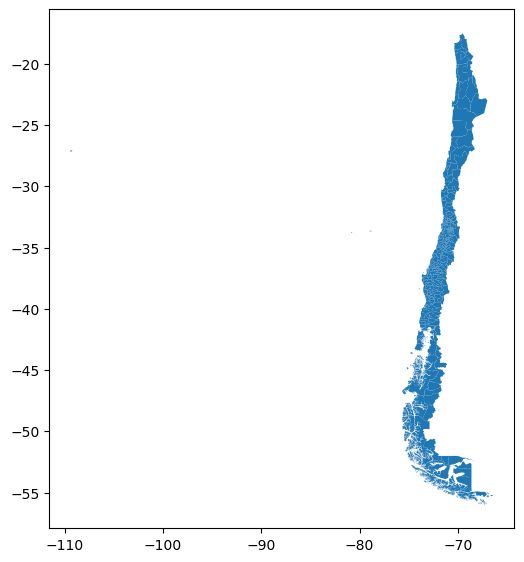

In [46]:
gdf_comunas.plot(figsize=(6,8))

---

## <h1><center>Ruralidad (0.8 pts) </center></h1>
## <h1><center> 4.1.a. ¿Cuál es la cantidad de establecimientos rurales vs urbanos según nivel de enseñanza?</center></h1>









# <h1><center>Parvularia </center></h1>

/var/folders/2m/78v6gw9x19x1vhlbn1gn2pp40000gn/T/ipykernel_1472/2020905690.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  datos1= dfP.groupby("DS_RURALIDAD")["DS_NOM_ESTABLE"].count()


<Axes: title={'center': 'Cantidad de establecimientos por ruralidad - Parvularia'}, xlabel='DS_RURALIDAD'>

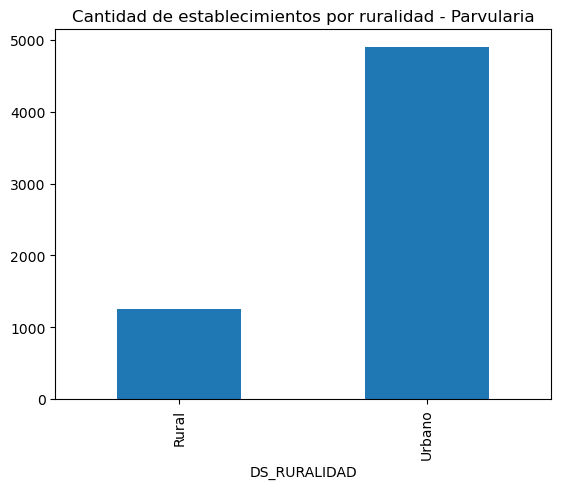

In [47]:
#sacamos elvalor de los rurales y urbanos
datos1= dfP.groupby("DS_RURALIDAD")["DS_NOM_ESTABLE"].count()
datos1.plot(kind="bar", title="Cantidad de establecimientos por ruralidad - Parvularia")

In [125]:
dfP.groupby("DS_RURALIDAD")["DS_NOM_ESTABLE"].count()

/var/folders/2m/78v6gw9x19x1vhlbn1gn2pp40000gn/T/ipykernel_1472/1948867256.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfP.groupby("DS_RURALIDAD")["DS_NOM_ESTABLE"].count()


DS_RURALIDAD
Rural     1260
Urbano    4903
Name: DS_NOM_ESTABLE, dtype: int64

In [48]:
# RESPUESTA: En parvularia : Rural     1260 ; Urbano    4903

# <h1><center>1º Ciclo Básico </center></h1>

/var/folders/2m/78v6gw9x19x1vhlbn1gn2pp40000gn/T/ipykernel_1472/1985784156.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  datos2= dfn.groupby("DS_RURALIDAD")["DS_NOM_ESTABLE"].count()


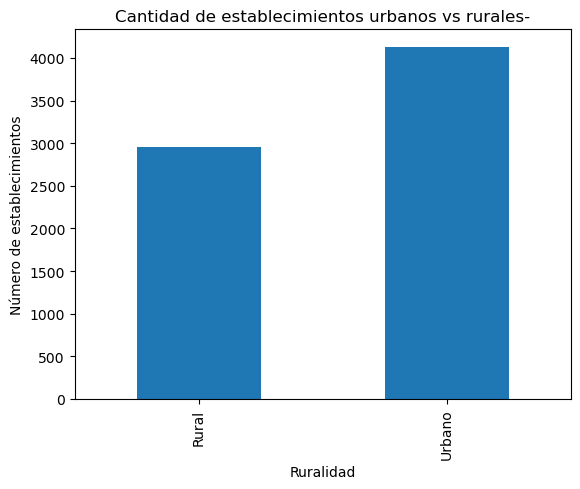

In [ ]:
#Elijo el nivel de enseñanza
dfn= df1

#Agrupo por ruralidad
datos2= dfn.groupby("DS_RURALIDAD")["DS_NOM_ESTABLE"].count()

#ploteo
datos2.plot(kind='bar', title='Cantidad de establecimientos urbanos vs rurales- 1ciclo')
plt.xlabel('Ruralidad')
plt.ylabel('Número de establecimientos')
plt.show()


In [126]:
df1.groupby("DS_RURALIDAD")["DS_NOM_ESTABLE"].count()

/var/folders/2m/78v6gw9x19x1vhlbn1gn2pp40000gn/T/ipykernel_1472/20538099.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1.groupby("DS_RURALIDAD")["DS_NOM_ESTABLE"].count()


DS_RURALIDAD
Rural     2954
Urbano    4128
Name: DS_NOM_ESTABLE, dtype: int64

In [ ]:
# RESPUESTA: en 1 ciclo : Rural     2954 ; Urbano    4128

# <h1><center>2º Ciclo Básico </center></h1>

/var/folders/2m/78v6gw9x19x1vhlbn1gn2pp40000gn/T/ipykernel_1472/3474777777.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  datos3= dfn.groupby("DS_RURALIDAD")["DS_NOM_ESTABLE"].count()


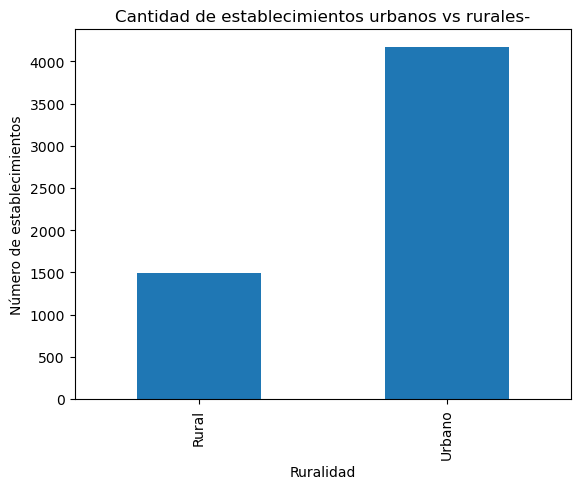

In [ ]:
#Elijo el nivel de enseñanza
dfn= df2

#Agrupo por ruralidad
datos3= dfn.groupby("DS_RURALIDAD")["DS_NOM_ESTABLE"].count()

#ploteo
datos3.plot(kind='bar', title='2 ciclo, urbanos vs rurales-')
plt.xlabel('Ruralidad')
plt.ylabel('Número de establecimientos')
plt.show()

In [130]:
dfn.groupby("DS_RURALIDAD")["DS_NOM_ESTABLE"].count()


/var/folders/2m/78v6gw9x19x1vhlbn1gn2pp40000gn/T/ipykernel_1472/899732323.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfn.groupby("DS_RURALIDAD")["DS_NOM_ESTABLE"].count()


DS_RURALIDAD
Rural     1492
Urbano    4170
Name: DS_NOM_ESTABLE, dtype: int64

In [ ]:
# RESPUESTA: En 2 ciclo : Rural     1492 ; Urbano    4170

# <h1><center>Media </center></h1>

/var/folders/2m/78v6gw9x19x1vhlbn1gn2pp40000gn/T/ipykernel_1472/2823571431.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  datos4= dfn.groupby("DS_RURALIDAD")["DS_NOM_ESTABLE"].count()


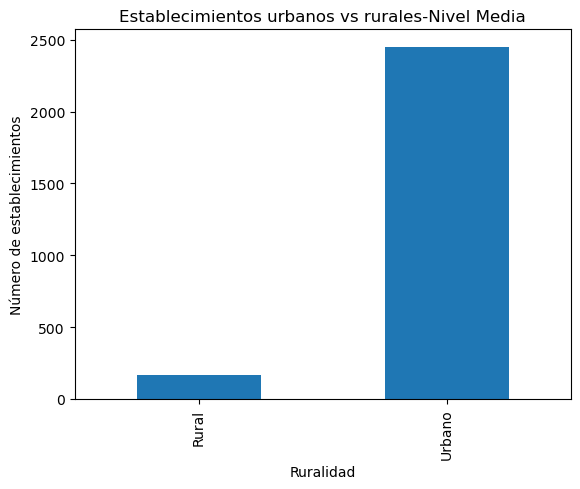

In [133]:
#Elijo el nivel de enseñanza
dfn= dfM

#Agrupo por ruralidad
datos4= dfn.groupby("DS_RURALIDAD")["DS_NOM_ESTABLE"].count()

#ploteo
datos4.plot(kind='bar', title='Establecimientos urbanos vs rurales-Nivel Media')
plt.xlabel('Ruralidad')
plt.ylabel('Número de establecimientos')
plt.show()

In [134]:
dfn.groupby("DS_RURALIDAD")["DS_NOM_ESTABLE"].count()

/var/folders/2m/78v6gw9x19x1vhlbn1gn2pp40000gn/T/ipykernel_1472/3136175204.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfn.groupby("DS_RURALIDAD")["DS_NOM_ESTABLE"].count()


DS_RURALIDAD
Rural      169
Urbano    2449
Name: DS_NOM_ESTABLE, dtype: int64

In [ ]:
# RESPUESTA: En nivel Media : Rural     169 ; Urbano    2449

# <h1><center> GRAFICA ACUMULADA</center></h1>

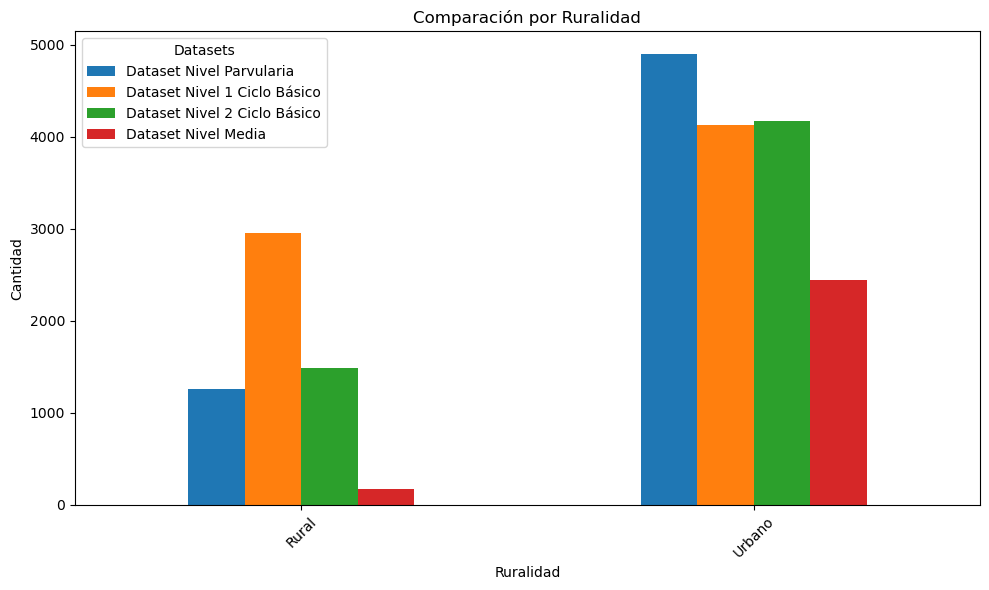

In [136]:
comparacion = pd.DataFrame({
    'Dataset Nivel Parvularia': datos1,
    'Dataset Nivel 1 Ciclo Básico': datos2,
    'Dataset Nivel 2 Ciclo Básico': datos3,
    'Dataset Nivel Media': datos4
})

comparacion.plot(kind='bar', figsize=(10, 6))
plt.title('Comparación por Ruralidad')
plt.xlabel('Ruralidad')
plt.ylabel('Cantidad')
plt.legend(title='Datasets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**ANALISIS DEL GRAFICO Y RESPUESTA :**

- Primero, encontramos un predominio de los establecimientos en comunas urbanas
- Segundo, en nivel media, la presencia rural es bajisima, casi inexistente
- Tercero , hay una predominancia muy fuerte en la el nivel parvulario de establecimientos urbanos
- Cuarto, no hay mucha diferencia entre 1 y 2 ciclo basico en cuanto a establecimientos urbanos, manteniendose constante.
- Quinto, la cantidad disminuye considerablemente desde nivel 1 basico hasta media en sectores rurales

---



# <h1><center> 4.b. ¿Cómo se distribuye el IVM según nivel de enseñanza y ruralidad?</center></h1>


# <h1><center>Parvularia </center></h1>

In [53]:
#elijo el df
dfn=dfP

dfn.groupby(["DS_RURALIDAD"])["IVM Establecimiento"].describe()

/var/folders/2m/78v6gw9x19x1vhlbn1gn2pp40000gn/T/ipykernel_1472/149827589.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfn.groupby(["DS_RURALIDAD"])["IVM Establecimiento"].describe()


,count,mean,std,min,25%,50%,75%,max
DS_RURALIDAD,,,,,,,,
Rural,1260.0,61.068737,5.437212,42.227474,57.337776,60.818438,64.290233,89.975762
Urbano,4903.0,54.019154,5.097436,27.757575,50.913159,54.012330,57.043053,87.043774


# <h1><center>1º Ciclo Básico </center></h1>

In [137]:
#elijo el df
dfn=df1
dfn.groupby(["DS_RURALIDAD"])["IVM Establecimiento"].describe()

/var/folders/2m/78v6gw9x19x1vhlbn1gn2pp40000gn/T/ipykernel_1472/2632017805.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfn.groupby(["DS_RURALIDAD"])["IVM Establecimiento"].describe()


,count,mean,std,min,25%,50%,75%,max
DS_RURALIDAD,,,,,,,,
Rural,2954.0,43.400184,4.388299,21.679300,41.094272,43.052262,45.257432,90.051453
Urbano,4128.0,43.609622,3.528504,26.531136,41.184535,42.983768,45.346655,59.825030


# <h1><center>2º Ciclo Básico </center></h1>

In [59]:
#elijo el df
dfn=df2

dfn.groupby(["DS_RURALIDAD"])["IVM Establecimiento"].describe()

/var/folders/2m/78v6gw9x19x1vhlbn1gn2pp40000gn/T/ipykernel_1472/2410757040.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfn.groupby(["DS_RURALIDAD"])["IVM Establecimiento"].describe()


,count,mean,std,min,25%,50%,75%,max
DS_RURALIDAD,,,,,,,,
Rural,1492.0,36.866174,3.172888,22.326651,35.052767,36.882793,38.743294,59.093128
Urbano,4170.0,38.993564,2.903128,30.574459,37.049090,38.891553,40.802732,74.680896


# <h1><center>Media </center></h1>

In [60]:
#elijo el df
dfn=dfM

dfn.groupby(["DS_RURALIDAD"])["IVM Establecimiento"].describe()

/var/folders/2m/78v6gw9x19x1vhlbn1gn2pp40000gn/T/ipykernel_1472/1233657678.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfn.groupby(["DS_RURALIDAD"])["IVM Establecimiento"].describe()


,count,mean,std,min,25%,50%,75%,max
DS_RURALIDAD,,,,,,,,
Rural,169.0,19.672758,2.903406,12.945924,17.874040,19.356355,21.270225,31.243590
Urbano,2449.0,20.292701,4.285935,11.343715,17.335834,19.488989,22.262429,68.025606


---


**1. Análisis de distribución entre niveles de enseñanza (por ejemplo, ver si Parvularia tiene IVM más alto que Media).**

In [61]:

# Lista de tuplas (DataFrame, nombre del nivel)
niveles = [
    (dfP, "Parvularia"),
    (df1, "1° Ciclo Básico"),
    (df2, "2° Ciclo Básico"),
    (dfM, "Media")
]

# Calcular estadísticas descriptivas del IVM para cada nivel
resumenes = []
for df, nombre in niveles:
    desc = df["IVM Establecimiento"].describe().to_dict()
    desc["Nivel"] = nombre
    resumenes.append(desc)

# Convertir a DataFrame ordenado
df_resumen = pd.DataFrame(resumenes).set_index("Nivel")[["count","mean","std","min","25%","50%","75%","max"]]
df_resumen = df_resumen.round(2)

# Mostrar tabla final
display(df_resumen)




,count,mean,std,min,25%,50%,75%,max
Nivel,,,,,,,,
Parvularia,6163.0,55.46,5.90,27.76,51.74,55.05,58.95,89.98
1° Ciclo Básico,7082.0,43.52,3.91,21.68,41.15,43.01,45.32,90.05
2° Ciclo Básico,5662.0,38.43,3.12,22.33,36.47,38.38,40.39,74.68
Media,2618.0,20.25,4.21,11.34,17.41,19.48,22.18,68.03


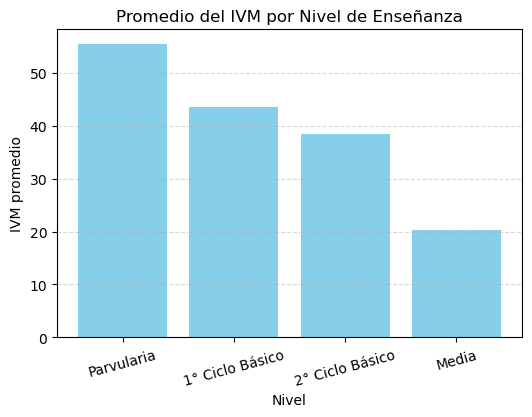

In [62]:
plt.figure(figsize=(6,4))
plt.bar(df_resumen.index, df_resumen["mean"], color="skyblue")
plt.title("Promedio del IVM por Nivel de Enseñanza")
plt.xlabel("Nivel")
plt.ylabel("IVM promedio")
plt.xticks(rotation=15)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

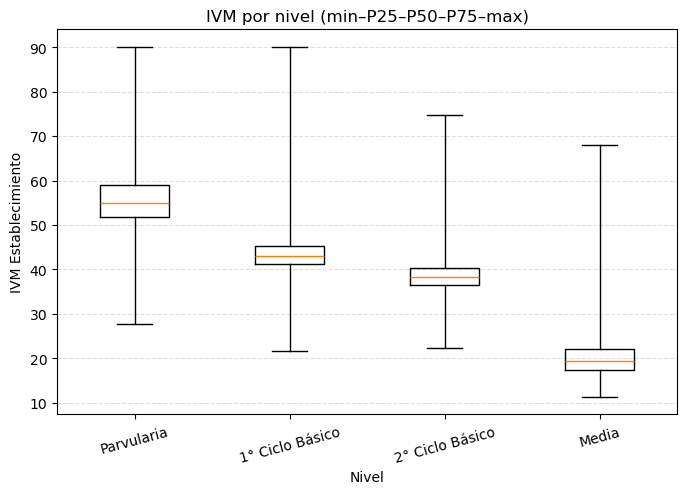

In [ ]:
# Preparo datos para boxplot
 bxp_stats = []
for nivel, row in df_resumen.iterrows():
    bxp_stats.append({
        'label' : nivel,
        'whislo': row['min'],   # mínimo
        'q1'    : row['25%'],   # percentil 25
        'med'   : row['50%'],   # mediana
        'q3'    : row['75%'],   # percentil 75
        'whishi': row['max'],   # máximo
        'fliers': []            # sin outliers (no los tenemos)
    })

 fig, ax = plt.subplots(figsize=(8,5))
ax.bxp(bxp_stats, showfliers=False)
ax.set_title('IVM por nivel (min–P25–P50–P75–max)')
ax.set_xlabel('Nivel')
ax.set_ylabel('IVM Establecimiento')
ax.grid(axis='y', linestyle='--', alpha=0.4)
plt.xticks(rotation=15)
plt.show()

Los resultados muestran una clara disminución del IVM a medida que aumenta el nivel educativo.
La educación parvularia concentra los establecimientos con mayor vulnerabilidad, mientras que la educación media presenta los niveles más bajos.
Esto sugiere que las brechas socioeducativas son más pronunciadas en la primera infancia, y que las condiciones tienden a mejorar (o estabilizarse) en niveles superiores.

A medida que avanza el nivel educativo (desde Parvularia hasta Media), el IVM disminuye progresivamente. Esto sugiere que la vulnerabilidad social y educativa tiende a concentrarse en los niveles iniciales (educación parvularia), especialmente en la primera infancia.

---


**2. Análisis de distribución de IVM por ruralidad**

In [64]:
def add_level(df, nivel):
    cols = ['DS_RURALIDAD', 'IVM Establecimiento', 'N EVALUADO', 'ID_RBD']
    out = df[cols].copy()
    out['Nivel'] = nivel
    return out

dfall = pd.concat([
    add_level(dfP, 'Parvularia'),
    add_level(df1, '1° Ciclo Básico'),
    add_level(df2, '2° Ciclo Básico'),
    add_level(dfM, 'Media')
], ignore_index=True)

             Nivel DS_RURALIDAD  IVM Establecimiento
0  1° Ciclo Básico        Rural            43.400184
1  1° Ciclo Básico       Urbano            43.609622
2  2° Ciclo Básico        Rural            36.866174
3  2° Ciclo Básico       Urbano            38.993564
4            Media        Rural            19.672758
5            Media       Urbano            20.292701
6       Parvularia        Rural            61.068737
7       Parvularia       Urbano            54.019154


/var/folders/2m/78v6gw9x19x1vhlbn1gn2pp40000gn/T/ipykernel_1472/4288150983.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_all.groupby(['Nivel', 'DS_RURALIDAD'])['IVM Establecimiento']


<Figure size 800x500 with 0 Axes>

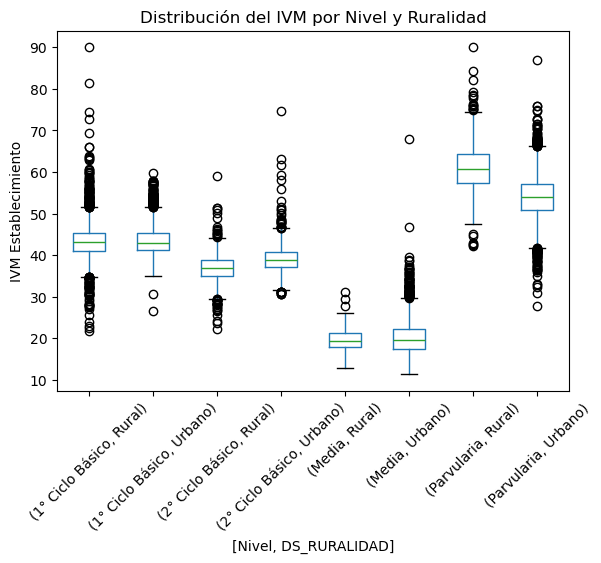

In [ ]:
  
 dfP['Nivel'] = 'Parvularia'
df1['Nivel'] = '1° Ciclo Básico'
df2['Nivel'] = '2° Ciclo Básico'
dfM['Nivel'] = 'Media'

df_all = pd.concat([dfP, df1, df2, dfM], ignore_index=True)

 resumen = (
    df_all.groupby(['Nivel', 'DS_RURALIDAD'])['IVM Establecimiento']
    .mean()
    .reset_index()
    .sort_values(['Nivel', 'DS_RURALIDAD'])
)
print(resumen)

 plt.figure(figsize=(8,5))
df_all.boxplot(column='IVM Establecimiento', by=['Nivel', 'DS_RURALIDAD'], grid=False)
plt.title('Distribución del IVM por Nivel y Ruralidad')
plt.suptitle('')
plt.ylabel('IVM Establecimiento')
plt.xticks(rotation=45)
plt.show()

En general, los establecimientos Parvularios Rurales presentan el IVM más alto (61 puntos), superando a sus pares urbanos (54 puntos).
En los demás niveles (Básica y Media) las diferencias entre rural y urbano son pequeñas o invertidas, con valores levemente menores en el sector rural.
Esto sugiere que la vulnerabilidad es más pronunciada en la educación inicial rural, mientras que en los niveles superiores la brecha rural-urbana tiende a desaparecer o incluso revertirse

# <h1><center> 4.3 Pregunta Bono: Dimensiones de vulnerabilidad</center></h1>


Vacío

# <h1><center>  5.1 Cálculo de IVM promedio por comuna (0.8 pts)</center></h1>


- 5.1.2 calcule el promedio de la columna `IVM Establecimiento` según comuna para cada nivel
- 5.1.3 Crear columna `IVM Promedio {NIVEL DE ENSEÑANZA}` 


# <h1><center>Parvularia </center></h1>

In [66]:
dfn= dfP
promedio_P= dfn.groupby(['DS_COMUNA_ESTABLE']).agg({'IVM Establecimiento': 'mean'})
promedio_P=promedio_P.rename(columns={'IVM Establecimiento': 'IVM Promedio Parvularia'})
promedio_P.sample(15)

/var/folders/2m/78v6gw9x19x1vhlbn1gn2pp40000gn/T/ipykernel_1472/2927008734.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promedio_P= dfn.groupby(['DS_COMUNA_ESTABLE']).agg({'IVM Establecimiento': 'mean'})


,IVM Promedio Parvularia
DS_COMUNA_ESTABLE,
Pica,59.654430
Lo Espejo,54.706133
Estación Central,51.954303
Casablanca,56.963887
Chonchi,62.106155
La Florida,50.478038
Quillota,53.050208
Antofagasta,51.857501
Chillán,53.451497


# <h1><center>1 Ciclo Basico </center></h1>

In [67]:
dfn= df1
promedio_1= dfn.groupby(['DS_COMUNA_ESTABLE']).agg({'IVM Establecimiento': 'mean'})
promedio_1=promedio_1.rename(columns={'IVM Establecimiento': 'IVM Promedio 1º Ciclo Básico'})
promedio_1.sample(15)

/var/folders/2m/78v6gw9x19x1vhlbn1gn2pp40000gn/T/ipykernel_1472/1272074610.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promedio_1= dfn.groupby(['DS_COMUNA_ESTABLE']).agg({'IVM Establecimiento': 'mean'})


,IVM Promedio 1º Ciclo Básico
DS_COMUNA_ESTABLE,
Quilleco,42.905389
Nancagua,47.075873
Providencia,40.743711
La Cruz,43.190803
San Vicente,43.763333
Ollagüe,47.056717
Pumanque,44.239658
Chile Chico,43.992799
Antofagasta,43.987564


# <h1><center>2 Ciclo basico </center></h1>

In [68]:
dfn= df2
promedio_2= dfn.groupby(['DS_COMUNA_ESTABLE']).agg({'IVM Establecimiento': 'mean'})
promedio_2=promedio_2.rename(columns={'IVM Establecimiento': 'IVM Promedio 2º Ciclo Básico'})
promedio_2.sample(15)

/var/folders/2m/78v6gw9x19x1vhlbn1gn2pp40000gn/T/ipykernel_1472/2591888676.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promedio_2= dfn.groupby(['DS_COMUNA_ESTABLE']).agg({'IVM Establecimiento': 'mean'})


,IVM Promedio 2º Ciclo Básico
DS_COMUNA_ESTABLE,
Cochamó,34.931109
Osorno,38.314896
Calera de Tango,38.382255
Sagrada Familia,37.011293
Romeral,37.647767
Tocopilla,37.493485
Nueva Imperial,37.895227
Hijuelas,36.648017
Quemchi,32.026341


# <h1><center>Media </center></h1>

In [69]:
dfn= dfM
promedio_M= dfn.groupby(['DS_COMUNA_ESTABLE']).agg({'IVM Establecimiento': 'mean'})
promedio_M=promedio_M.rename(columns={'IVM Establecimiento': 'IVM Promedio Media'})
promedio_M.sample(15)

/var/folders/2m/78v6gw9x19x1vhlbn1gn2pp40000gn/T/ipykernel_1472/2292469972.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promedio_M= dfn.groupby(['DS_COMUNA_ESTABLE']).agg({'IVM Establecimiento': 'mean'})


,IVM Promedio Media
DS_COMUNA_ESTABLE,
Pozo Almonte,22.676408
El Quisco,17.802495
Río Negro,18.673260
Machalí,19.525738
Quemchi,21.243488
Palena,17.324388
Rancagua,20.482505
Futrono,18.329558
Curaco de Vélez,19.321113


---

- 5.1.4 Crear dataframe unificado llamado `ivm_comunal` con columnas indicadas
* Comuna (nombre y ID)
* Región (ID)
* IVM Promedio Parvularia de la comuna
* IVM Promedio Básica Primer Ciclo de la comuna
* IVM Promedio Básica Segundo Ciclo de la comuna
* IVM Promedio Media de la comuna



# <h1><center>Parvularia </center></h1>

In [70]:
dfP_c = dfP.merge(promedio_P, on='DS_COMUNA_ESTABLE', how='left')
dfP_c.sample(5)


,ID_RBD,DV_RBD,DS_NOM_ESTABLE,DS_TIPO_DEPENDENCIA,DS_RURALIDAD,ID_REGION_ESTABLE,ID_PROVINCIA_ESTABLE,ID_COMUNA_ESTABLE,DS_COMUNA_ESTABLE,N EVALUADO,...,IVM Alto,IVM Muy Alto,IVM Salud,IVM CSE Familiar,IVM Estimulación y Apoyo,IVM Familia,IVM CSE Comunal,IVM Derechos,Nivel,IVM Promedio Parvularia
508,1447,8,ESCUELA BASICA ULDA ARACENA GONZALEZ,Municipal DAEM,Urbano,5,55,5506,Nogales,52,...,12,21,25.540440,46.472251,38.361495,69.374393,14.679457,3.727103,Parvularia,55.745994
2419,7776,3,ESCUELA RURAL EL SEMBRADOR,Municipal DAEM,Rural,10,101,10102,Calbuco,13,...,2,10,25.173017,54.787807,37.258753,65.467894,46.178644,25.178576,Parvularia,63.073550
5549,25944,6,ESCUELA PART. PARTHENON COLLEGE,Particular Subvencionado,Urbano,13,136,13605,Peñaflor,50,...,14,7,27.325371,39.176131,42.495267,67.092911,10.164958,6.546430,Parvularia,53.557888
4333,16711,8,ESCUELA DE LENGUAJE Y JARDIN INFANTIL PEQUEÑO,Particular Subvencionado,Urbano,7,73,7303,Licantén,64,...,12,24,22.624809,41.453573,38.397137,73.171898,26.825831,20.836127,Parvularia,55.922018
1916,5315,5,COLEGIO PARTIC. WOLFGANG AMADEUS MOZART,Particular Subvencionado,Urbano,9,92,9202,Collipulli,121,...,31,33,24.973688,38.914477,36.890025,71.163103,29.357627,13.325465,Parvularia,60.586423


In [71]:
dfP_c.columns


Index(['ID_RBD', 'DV_RBD', 'DS_NOM_ESTABLE', 'DS_TIPO_DEPENDENCIA',
       'DS_RURALIDAD', 'ID_REGION_ESTABLE', 'ID_PROVINCIA_ESTABLE',
       'ID_COMUNA_ESTABLE', 'DS_COMUNA_ESTABLE', 'N EVALUADO',
       'IVM Establecimiento', 'IVM Bajo', 'IVM Medio', 'IVM Alto',
       'IVM Muy Alto', 'IVM Salud', 'IVM CSE Familiar',
       'IVM Estimulación y Apoyo', 'IVM Familia', 'IVM CSE Comunal',
       'IVM Derechos', 'Nivel', 'IVM Promedio Parvularia'],
      dtype='object')

In [72]:
dfP_ivm_comunal = dfP_c[["ID_COMUNA_ESTABLE", "DS_COMUNA_ESTABLE", "ID_REGION_ESTABLE", "IVM Promedio Parvularia"]]
dfP_ivm_comunal.head()

,ID_COMUNA_ESTABLE,DS_COMUNA_ESTABLE,ID_REGION_ESTABLE,IVM Promedio Parvularia
0,15101,Arica,15,52.904976
1,15101,Arica,15,52.904976
2,15101,Arica,15,52.904976
3,15101,Arica,15,52.904976
4,15101,Arica,15,52.904976


In [73]:
dfP_ivm_comunal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6163 entries, 0 to 6162
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID_COMUNA_ESTABLE        6163 non-null   category
 1   DS_COMUNA_ESTABLE        6163 non-null   category
 2   ID_REGION_ESTABLE        6163 non-null   category
 3   IVM Promedio Parvularia  6163 non-null   float64 
dtypes: category(3), float64(1)
memory usage: 100.5 KB


In [74]:
dfP_ivm_comunal_no_duplicada= dfP_ivm_comunal.drop_duplicates(subset=['DS_COMUNA_ESTABLE'])
dfP_ivm_comunal_no_duplicada.info()
#DEJO EL DATAFRAME SOLO CON LAS COMUNAS SIN REPETIR

<class 'pandas.core.frame.DataFrame'>
Index: 338 entries, 0 to 4683
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID_COMUNA_ESTABLE        338 non-null    category
 1   DS_COMUNA_ESTABLE        338 non-null    category
 2   ID_REGION_ESTABLE        338 non-null    category
 3   IVM Promedio Parvularia  338 non-null    float64 
dtypes: category(3), float64(1)
memory usage: 29.1 KB


# <h1><center>1º Ciclo Basica</center></h1>

In [75]:
df1_c = df1.merge(promedio_1, on='DS_COMUNA_ESTABLE', how='left')
df1_c.sample(5)

,ID_RBD,DV_RBD,DS_NOM_ESTABLE,DS_TIPO_DEPENDENCIA,DS_RURALIDAD,ID_REGION_ESTABLE,ID_PROVINCIA_ESTABLE,ID_COMUNA_ESTABLE,DS_COMUNA_ESTABLE,N EVALUADO,...,IVM Salud,IVM Discapacidad,IVM Educación,IVM Habitabilidad,IVM Familiar,IVM Participación,IVM CSE Familia,IVM CSE Comunal,Nivel,IVM Promedio 1º Ciclo Básico
3710,7580,9,ESCUELA RURAL PULOTRE,Municipal DAEM,Rural,10,103,10306,San Juan de la Costa,6,...,53.228353,0.000000,7.512218,23.583997,36.489250,2.171469,59.647300,58.410114,1° Ciclo Básico,44.866423
7066,41947,8,ESCUELA HOSPITALARIA SAN CAMILO,Particular Subvencionado,Urbano,5,57,5701,San Felipe,27,...,40.216978,17.868349,18.407642,17.781567,47.225996,1.701023,54.458443,15.571474,1° Ciclo Básico,43.339183
6203,22041,8,CENTRO EDUCACIONAL PAZ Y AMOR,Particular Subvencionado,Urbano,10,102,10202,Ancud,112,...,43.499078,5.064099,12.101868,19.360614,31.922992,0.465315,46.881994,22.975615,1° Ciclo Básico,41.866003
3604,7307,5,ESCUELA RURAL LA ENSENADA,Municipal DAEM,Rural,14,142,14203,Lago Ranco,4,...,47.905518,0.000000,20.507323,23.467931,38.513775,0.000000,56.980117,49.563107,1° Ciclo Básico,45.311712
121,232,1,ESCUELA BASICA PEDRO VERGARA KELLER,Servicio Local de Educación(SLE),Urbano,2,22,2201,Calama,339,...,38.694810,9.635481,13.778211,21.598606,33.695430,31.883389,54.778640,17.346345,1° Ciclo Básico,43.690662


In [76]:
df1_ivm_comunal = df1_c[["ID_COMUNA_ESTABLE", "DS_COMUNA_ESTABLE", "ID_REGION_ESTABLE", "IVM Promedio 1º Ciclo Básico"]]
df1_ivm_comunal.head()

,ID_COMUNA_ESTABLE,DS_COMUNA_ESTABLE,ID_REGION_ESTABLE,IVM Promedio 1º Ciclo Básico
0,15101,Arica,15,47.300547
1,15101,Arica,15,47.300547
2,15101,Arica,15,47.300547
3,15101,Arica,15,47.300547
4,15101,Arica,15,47.300547


In [77]:
df1_ivm_comunal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7082 entries, 0 to 7081
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   ID_COMUNA_ESTABLE             7082 non-null   category
 1   DS_COMUNA_ESTABLE             7082 non-null   category
 2   ID_REGION_ESTABLE             7082 non-null   category
 3   IVM Promedio 1º Ciclo Básico  7082 non-null   float64 
dtypes: category(3), float64(1)
memory usage: 112.3 KB


In [78]:
df1_ivm_comunal_no_duplicada= df1_ivm_comunal.drop_duplicates(subset=['DS_COMUNA_ESTABLE'])
df1_ivm_comunal_no_duplicada.info()
#DEJO EL DATAFRAME SOLO CON LAS COMUNAS SIN REPETIR

<class 'pandas.core.frame.DataFrame'>
Index: 345 entries, 0 to 5355
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   ID_COMUNA_ESTABLE             345 non-null    category
 1   DS_COMUNA_ESTABLE             345 non-null    category
 2   ID_REGION_ESTABLE             345 non-null    category
 3   IVM Promedio 1º Ciclo Básico  345 non-null    float64 
dtypes: category(3), float64(1)
memory usage: 29.3 KB


# <h1><center>2º Ciclo Básica </center></h1>

In [79]:
df2_c = df2.merge(promedio_2, on='DS_COMUNA_ESTABLE', how='left')

In [80]:
df2_c.sample(5)

,ID_RBD,DV_RBD,DS_NOM_ESTABLE,DS_TIPO_DEPENDENCIA,DS_RURALIDAD,ID_REGION_ESTABLE,ID_PROVINCIA_ESTABLE,ID_COMUNA_ESTABLE,DS_COMUNA_ESTABLE,N EVALUADO,IVM Establecimiento,IVM Bajo,IVM Medio,IVM Alto,IVM Muy Alto,Nivel,IVM Promedio 2º Ciclo Básico
4771,20082,4,ESCUELA PART.NUESTRA SENORA DEL ROSARIO,Particular Subvencionado,Urbano,9,92,9201,Angol,69,36.786079,58,5,4,2,2° Ciclo Básico,37.646501
4356,14687,0,COLEGIO GEA,Particular Subvencionado,Urbano,5,58,5801,Quilpué,132,38.842290,102,10,12,8,2° Ciclo Básico,38.481152
4069,12570,9,COLEGIO ALTA CORDILLERA,Particular Subvencionado,Urbano,15,151,15101,Arica,365,37.246662,317,14,21,13,2° Ciclo Básico,38.244745
3452,10099,4,ESCUELA GENERAL RENE ESCAURIAZA,Servicio Local de Educación(SLE),Urbano,13,131,13103,Cerro Navia,62,41.462733,41,4,10,7,2° Ciclo Básico,41.126260
3199,9506,0,ESC.BAS.PROFESORA AIDA RAMOS DIAZ,Particular Subvencionado,Urbano,13,131,13121,Pedro Aguirre Cerda,55,39.273315,45,5,4,1,2° Ciclo Básico,41.768963


In [81]:
df2_ivm_comunal = df2_c[["ID_COMUNA_ESTABLE", "DS_COMUNA_ESTABLE", "ID_REGION_ESTABLE", "IVM Promedio 2º Ciclo Básico"]]
df2_ivm_comunal.head()

,ID_COMUNA_ESTABLE,DS_COMUNA_ESTABLE,ID_REGION_ESTABLE,IVM Promedio 2º Ciclo Básico
0,15101,Arica,15,38.244745
1,15101,Arica,15,38.244745
2,15101,Arica,15,38.244745
3,15101,Arica,15,38.244745
4,15101,Arica,15,38.244745


In [82]:
df2_ivm_comunal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5662 entries, 0 to 5661
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   ID_COMUNA_ESTABLE             5662 non-null   category
 1   DS_COMUNA_ESTABLE             5662 non-null   category
 2   ID_REGION_ESTABLE             5662 non-null   category
 3   IVM Promedio 2º Ciclo Básico  5662 non-null   float64 
dtypes: category(3), float64(1)
memory usage: 94.3 KB


In [83]:
df2_ivm_comunal_no_duplicada= df2_ivm_comunal.drop_duplicates(subset=['DS_COMUNA_ESTABLE'])
df2_ivm_comunal_no_duplicada.info()
#DEJO EL DATAFRAME SOLO CON LAS COMUNAS SIN REPETIR

<class 'pandas.core.frame.DataFrame'>
Index: 344 entries, 0 to 5034
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   ID_COMUNA_ESTABLE             344 non-null    category
 1   DS_COMUNA_ESTABLE             344 non-null    category
 2   ID_REGION_ESTABLE             344 non-null    category
 3   IVM Promedio 2º Ciclo Básico  344 non-null    float64 
dtypes: category(3), float64(1)
memory usage: 29.3 KB


# <h1><center>Media </center></h1>

In [84]:
dfM.sample(5)

,ID_RBD,DV_RBD,DS_NOM_ESTABLE,DS_TIPO_DEPENDENCIA,DS_RURALIDAD,ID_REGION_ESTABLE,ID_PROVINCIA_ESTABLE,ID_COMUNA_ESTABLE,DS_COMUNA_ESTABLE,N EVALUADO,IVM Establecimiento,IVM Bajo,IVM Medio,IVM Alto,IVM Muy Alto,Nivel
589,4292,7,ESCUELA SALTO EL LAJA,Municipal DAEM,Rural,8,83,8303,Cabrero,116,16.555450,74,12,10,20,Media
1626,13503,8,COLEGIO VALENTIN LETELIER,Particular Subvencionado,Urbano,4,41,4101,La Serena,223,17.687931,146,20,16,41,Media
2108,22372,7,COMPLEJO EDUCACIONAL SAN CRESCENTE,Particular Subvencionado,Rural,10,102,10201,Castro,136,17.643162,81,16,17,22,Media
1000,8604,5,COLEGIO SANTA CRUZ,Particular Subvencionado,Urbano,13,131,13101,Santiago,299,17.181503,208,21,24,46,Media
1977,18114,5,COLEGIO A-LAFKEN,Particular Subvencionado,Urbano,8,81,8107,Penco,123,14.054713,101,16,3,3,Media


In [85]:
#junto los dos dataframes
dfM_c = dfM.merge(promedio_M, on='DS_COMUNA_ESTABLE', how='left')
dfM_c.sample(5)

,ID_RBD,DV_RBD,DS_NOM_ESTABLE,DS_TIPO_DEPENDENCIA,DS_RURALIDAD,ID_REGION_ESTABLE,ID_PROVINCIA_ESTABLE,ID_COMUNA_ESTABLE,DS_COMUNA_ESTABLE,N EVALUADO,IVM Establecimiento,IVM Bajo,IVM Medio,IVM Alto,IVM Muy Alto,Nivel,IVM Promedio Media
1946,17860,8,COLEGIO SAN LUIS,Particular Subvencionado,Urbano,8,81,8110,Talcahuano,240,19.002202,130,28,17,65,Media,18.798452
108,575,4,COLEGIO PROVIDENCIA,Particular Subvencionado,Urbano,4,41,4101,La Serena,688,20.488445,297,81,73,237,Media,19.179865
1202,9781,0,CENTRO POLITECNICO PARTICULAR SAN RAMON,Particular Subvencionado,Urbano,13,131,13109,La Cisterna,1047,24.448050,325,101,103,518,Media,22.179204
1191,9726,8,LICEO TENIENTE FRANCISCO MERY AGUIRRE,Servicio Local de Educación(SLE),Urbano,13,131,13116,Lo Espejo,145,30.145956,28,11,7,99,Media,24.894399
1625,13491,0,COLEGIO ALTAZOR,Particular Subvencionado,Urbano,4,41,4102,Coquimbo,298,20.770512,146,31,19,102,Media,19.783487


In [86]:
#filtro el dataframes por columnas necesarias
dfM_ivm_comunal = dfM_c[["ID_COMUNA_ESTABLE", "DS_COMUNA_ESTABLE", "ID_REGION_ESTABLE", "IVM Promedio Media"]]
dfM_ivm_comunal.sample(25)

,ID_COMUNA_ESTABLE,DS_COMUNA_ESTABLE,ID_REGION_ESTABLE,IVM Promedio Media
2417,13401,San Bernardo,13,20.343896
1267,13103,Cerro Navia,13,24.057372
2236,13201,Puente Alto,13,21.150441
792,9120,Villarrica,9,18.155893
696,8201,Lebu,8,19.918426
2383,13119,Maipú,13,20.565429
2092,10201,Castro,10,19.144760
1846,7301,Curicó,7,18.758659
817,9121,Cholchol,9,17.796872
929,10204,Curaco de Vélez,10,19.321113


In [87]:
dfM_ivm_comunal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2618 entries, 0 to 2617
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID_COMUNA_ESTABLE   2618 non-null   category
 1   DS_COMUNA_ESTABLE   2618 non-null   category
 2   ID_REGION_ESTABLE   2618 non-null   category
 3   IVM Promedio Media  2618 non-null   float64 
dtypes: category(3), float64(1)
memory usage: 55.5 KB


In [88]:
dfM_ivm_comunal_no_duplicada= dfM_ivm_comunal.drop_duplicates(subset=['DS_COMUNA_ESTABLE'])
dfM_ivm_comunal_no_duplicada.info()
#DEJO EL DATAFRAME SOLO CON LAS COMUNAS SIN REPETIR

<class 'pandas.core.frame.DataFrame'>
Index: 335 entries, 0 to 2578
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID_COMUNA_ESTABLE   335 non-null    category
 1   DS_COMUNA_ESTABLE   335 non-null    category
 2   ID_REGION_ESTABLE   335 non-null    category
 3   IVM Promedio Media  335 non-null    float64 
dtypes: category(3), float64(1)
memory usage: 29.0 KB


---

# <h1><center>Union de los Dataframes </center></h1>

In [90]:
dfM_ivm_comunal_no_duplicada.head()

,ID_COMUNA_ESTABLE,DS_COMUNA_ESTABLE,ID_REGION_ESTABLE,IVM Promedio Media
0,15101,Arica,15,20.125566
14,15102,Camarones,15,31.243590
15,15201,Putre,15,25.794290
16,1101,Iquique,1,22.109517
33,1404,Huara,1,20.097634


In [91]:
ivm_comunal= dfP_ivm_comunal_no_duplicada.merge(df1_ivm_comunal_no_duplicada, on=['ID_COMUNA_ESTABLE', 'DS_COMUNA_ESTABLE', 'ID_REGION_ESTABLE'],how='outer')
ivm_comunal.head()


,ID_COMUNA_ESTABLE,DS_COMUNA_ESTABLE,ID_REGION_ESTABLE,IVM Promedio Parvularia,IVM Promedio 1º Ciclo Básico
0,1101,Iquique,1,50.882970,45.131982
1,1107,Alto Hospicio,1,55.419776,46.599904
2,1401,Pozo Almonte,1,59.804991,44.159905
3,1402,Camiña,1,68.812360,46.127984
4,1403,Colchane,1,71.742419,56.888644


In [92]:
ivm_comunal= ivm_comunal.merge(df2_ivm_comunal_no_duplicada, on=['ID_COMUNA_ESTABLE', 'DS_COMUNA_ESTABLE', 'ID_REGION_ESTABLE'],how='outer')
ivm_comunal.head()  


,ID_COMUNA_ESTABLE,DS_COMUNA_ESTABLE,ID_REGION_ESTABLE,IVM Promedio Parvularia,IVM Promedio 1º Ciclo Básico,IVM Promedio 2º Ciclo Básico
0,1101,Iquique,1,50.882970,45.131982,39.182182
1,1107,Alto Hospicio,1,55.419776,46.599904,41.289463
2,1401,Pozo Almonte,1,59.804991,44.159905,35.386361
3,1402,Camiña,1,68.812360,46.127984,34.998365
4,1403,Colchane,1,71.742419,56.888644,32.721880


In [93]:
ivm_comunal= ivm_comunal.merge(dfM_ivm_comunal_no_duplicada, on=['ID_COMUNA_ESTABLE', 'DS_COMUNA_ESTABLE', 'ID_REGION_ESTABLE'],how='outer')
ivm_comunal.head()  


,ID_COMUNA_ESTABLE,DS_COMUNA_ESTABLE,ID_REGION_ESTABLE,IVM Promedio Parvularia,IVM Promedio 1º Ciclo Básico,IVM Promedio 2º Ciclo Básico,IVM Promedio Media
0,1101,Iquique,1,50.882970,45.131982,39.182182,22.109517
1,1107,Alto Hospicio,1,55.419776,46.599904,41.289463,24.250219
2,1401,Pozo Almonte,1,59.804991,44.159905,35.386361,22.676408
3,1402,Camiña,1,68.812360,46.127984,34.998365,17.966318
4,1403,Colchane,1,71.742419,56.888644,32.721880,27.648785


In [94]:
ivm_comunal.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   ID_COMUNA_ESTABLE             345 non-null    object  
 1   DS_COMUNA_ESTABLE             345 non-null    object  
 2   ID_REGION_ESTABLE             345 non-null    category
 3   IVM Promedio Parvularia       338 non-null    float64 
 4   IVM Promedio 1º Ciclo Básico  345 non-null    float64 
 5   IVM Promedio 2º Ciclo Básico  344 non-null    float64 
 6   IVM Promedio Media            335 non-null    float64 
dtypes: category(1), float64(4), object(2)
memory usage: 17.3+ KB


In [95]:
ivm_comunal.sample(25)


,ID_COMUNA_ESTABLE,DS_COMUNA_ESTABLE,ID_REGION_ESTABLE,IVM Promedio Parvularia,IVM Promedio 1º Ciclo Básico,IVM Promedio 2º Ciclo Básico,IVM Promedio Media
56,5405,Zapallar,5,56.536461,40.224054,36.714388,19.579406
83,6106,Graneros,6,54.546178,44.854288,40.010929,18.579329
311,14104,Los Lagos,14,62.335299,43.958490,34.682780,17.295276
205,9211,Victoria,9,59.376110,44.522480,37.480152,18.965588
40,5101,Valparaíso,5,53.878915,43.652175,38.980055,20.146144
305,13603,Isla de Maipo,13,57.068928,41.624603,39.112266,20.336057
60,5504,La Cruz,5,54.287058,43.190803,37.283162,22.675165
315,14108,Panguipulli,14,63.720740,44.005052,35.410746,17.553456
292,13302,Lampa,13,57.229219,43.259277,40.561064,21.574259
312,14105,Máfil,14,60.683143,44.121140,38.341847,19.300654


In [138]:
#agregamos drop true para q no se agreguen columnas random
ivm_comunal=ivm_comunal.reset_index(drop=True)


# <h1><center>DF unificado </center></h1>

In [139]:
ivm_comunal


,ID_COMUNA_ESTABLE,DS_COMUNA_ESTABLE,ID_REGION_ESTABLE,IVM Promedio Parvularia,IVM Promedio 1º Ciclo Básico,IVM Promedio 2º Ciclo Básico,IVM Promedio Media
0,1101,Iquique,1,50.882970,45.131982,39.182182,22.109517
1,1107,Alto Hospicio,1,55.419776,46.599904,41.289463,24.250219
2,1401,Pozo Almonte,1,59.804991,44.159905,35.386361,22.676408
3,1402,Camiña,1,68.812360,46.127984,34.998365,17.966318
4,1403,Colchane,1,71.742419,56.888644,32.721880,27.648785
...,...,...,...,...,...,...,...
340,16301,San Carlos,16,59.879125,44.090277,37.599845,17.725576
341,16302,Coihueco,16,62.859444,44.200530,37.216688,18.656963
342,16303,Ñiquén,16,67.046763,43.159573,37.417184,18.060595
343,16304,San Fabián,16,65.517362,45.258595,35.757593,19.178353


# <h1><center>  5.2 Establecimientos por comuna y ruralidad (0.8 pts) </center></h1>



- 5.2.1 Crear dataframe unificado llamado `estab_comunal`  con columnas indicadas`
- Contar la cantidad de establecimientos por comuna según ruralidad 


(Tenga en cuenta de que pueden aparecer establecimientos duplicados al combinar estos 4 DataFrames (por ejemplo, establecimientos que imparten múltiples niveles de enseñanza, desde 1º básico hasta 4º medio). Preocúpese de manejar estos casos antes de agrupar sus datos según ruralidad.)

In [98]:
df_todos = pd.concat([dfP, df1, df2, dfM], ignore_index=True)
df_todos.head()

,ID_RBD,DV_RBD,DS_NOM_ESTABLE,DS_TIPO_DEPENDENCIA,DS_RURALIDAD,ID_REGION_ESTABLE,ID_PROVINCIA_ESTABLE,ID_COMUNA_ESTABLE,DS_COMUNA_ESTABLE,N EVALUADO,...,IVM Familia,IVM CSE Comunal,IVM Derechos,Nivel,IVM Discapacidad,IVM Educación,IVM Habitabilidad,IVM Familiar,IVM Participación,IVM CSE Familia
0,2,7,PARVULARIO LAS ESPIGUITAS,Servicio Local de Educación(SLE),Urbano,15,151,15101,Arica,75,...,71.339647,13.929126,28.934927,Parvularia,NaN,NaN,NaN,NaN,NaN,NaN
1,8,6,COLEGIO INTEGRADO EDUARDO FREI MONTALVA,Servicio Local de Educación(SLE),Urbano,15,151,15101,Arica,29,...,70.761131,13.941963,25.186786,Parvularia,NaN,NaN,NaN,NaN,NaN,NaN
2,9,4,ESCUELA REPUBLICA DE ISRAEL,Servicio Local de Educación(SLE),Urbano,15,151,15101,Arica,194,...,70.725139,14.035447,26.995586,Parvularia,NaN,NaN,NaN,NaN,NaN,NaN
3,10,8,ESCUELA REPUBLICA DE FRANCIA,Servicio Local de Educación(SLE),Urbano,15,151,15101,Arica,16,...,71.969637,14.231790,29.929321,Parvularia,NaN,NaN,NaN,NaN,NaN,NaN
4,11,6,ESC. GRAL. PEDRO LAGOS MARCHANT,Servicio Local de Educación(SLE),Urbano,15,151,15101,Arica,45,...,67.164913,13.958703,34.009262,Parvularia,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
df_todos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ID_RBD                    21525 non-null  int64   
 1   DV_RBD                    21525 non-null  category
 2   DS_NOM_ESTABLE            21525 non-null  object  
 3   DS_TIPO_DEPENDENCIA       21525 non-null  object  
 4   DS_RURALIDAD              21525 non-null  category
 5   ID_REGION_ESTABLE         21525 non-null  category
 6   ID_PROVINCIA_ESTABLE      21525 non-null  int64   
 7   ID_COMUNA_ESTABLE         21525 non-null  int64   
 8   DS_COMUNA_ESTABLE         21525 non-null  object  
 9   N EVALUADO                21525 non-null  int64   
 10  IVM Establecimiento       21525 non-null  float64 
 11  IVM Bajo                  21525 non-null  int64   
 12  IVM Medio                 21525 non-null  int64   
 13  IVM Alto                  21525 non-null  int6

# <h1><center>Eliminamos establecimientos que imparten en varios niveles </center></h1>

In [100]:
#con  rbd podemos eliminar los establecimientos que imparten en varios niveles
df_todos = df_todos.drop_duplicates(subset=['ID_RBD'])
df_todos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9229 entries, 0 to 21504
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ID_RBD                    9229 non-null   int64   
 1   DV_RBD                    9229 non-null   category
 2   DS_NOM_ESTABLE            9229 non-null   object  
 3   DS_TIPO_DEPENDENCIA       9229 non-null   object  
 4   DS_RURALIDAD              9229 non-null   category
 5   ID_REGION_ESTABLE         9229 non-null   category
 6   ID_PROVINCIA_ESTABLE      9229 non-null   int64   
 7   ID_COMUNA_ESTABLE         9229 non-null   int64   
 8   DS_COMUNA_ESTABLE         9229 non-null   object  
 9   N EVALUADO                9229 non-null   int64   
 10  IVM Establecimiento       9229 non-null   float64 
 11  IVM Bajo                  9229 non-null   int64   
 12  IVM Medio                 9229 non-null   int64   
 13  IVM Alto                  9229 non-null   int64   
 

In [101]:
df_todos.head()

,ID_RBD,DV_RBD,DS_NOM_ESTABLE,DS_TIPO_DEPENDENCIA,DS_RURALIDAD,ID_REGION_ESTABLE,ID_PROVINCIA_ESTABLE,ID_COMUNA_ESTABLE,DS_COMUNA_ESTABLE,N EVALUADO,...,IVM Familia,IVM CSE Comunal,IVM Derechos,Nivel,IVM Discapacidad,IVM Educación,IVM Habitabilidad,IVM Familiar,IVM Participación,IVM CSE Familia
0,2,7,PARVULARIO LAS ESPIGUITAS,Servicio Local de Educación(SLE),Urbano,15,151,15101,Arica,75,...,71.339647,13.929126,28.934927,Parvularia,NaN,NaN,NaN,NaN,NaN,NaN
1,8,6,COLEGIO INTEGRADO EDUARDO FREI MONTALVA,Servicio Local de Educación(SLE),Urbano,15,151,15101,Arica,29,...,70.761131,13.941963,25.186786,Parvularia,NaN,NaN,NaN,NaN,NaN,NaN
2,9,4,ESCUELA REPUBLICA DE ISRAEL,Servicio Local de Educación(SLE),Urbano,15,151,15101,Arica,194,...,70.725139,14.035447,26.995586,Parvularia,NaN,NaN,NaN,NaN,NaN,NaN
3,10,8,ESCUELA REPUBLICA DE FRANCIA,Servicio Local de Educación(SLE),Urbano,15,151,15101,Arica,16,...,71.969637,14.231790,29.929321,Parvularia,NaN,NaN,NaN,NaN,NaN,NaN
4,11,6,ESC. GRAL. PEDRO LAGOS MARCHANT,Servicio Local de Educación(SLE),Urbano,15,151,15101,Arica,45,...,67.164913,13.958703,34.009262,Parvularia,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
df_todos.columns

Index(['ID_RBD', 'DV_RBD', 'DS_NOM_ESTABLE', 'DS_TIPO_DEPENDENCIA',
       'DS_RURALIDAD', 'ID_REGION_ESTABLE', 'ID_PROVINCIA_ESTABLE',
       'ID_COMUNA_ESTABLE', 'DS_COMUNA_ESTABLE', 'N EVALUADO',
       'IVM Establecimiento', 'IVM Bajo', 'IVM Medio', 'IVM Alto',
       'IVM Muy Alto', 'IVM Salud', 'IVM CSE Familiar',
       'IVM Estimulación y Apoyo', 'IVM Familia', 'IVM CSE Comunal',
       'IVM Derechos', 'Nivel', 'IVM Discapacidad', 'IVM Educación',
       'IVM Habitabilidad', 'IVM Familiar', 'IVM Participación',
       'IVM CSE Familia'],
      dtype='object')

In [103]:
df_todos.head()

,ID_RBD,DV_RBD,DS_NOM_ESTABLE,DS_TIPO_DEPENDENCIA,DS_RURALIDAD,ID_REGION_ESTABLE,ID_PROVINCIA_ESTABLE,ID_COMUNA_ESTABLE,DS_COMUNA_ESTABLE,N EVALUADO,...,IVM Familia,IVM CSE Comunal,IVM Derechos,Nivel,IVM Discapacidad,IVM Educación,IVM Habitabilidad,IVM Familiar,IVM Participación,IVM CSE Familia
0,2,7,PARVULARIO LAS ESPIGUITAS,Servicio Local de Educación(SLE),Urbano,15,151,15101,Arica,75,...,71.339647,13.929126,28.934927,Parvularia,NaN,NaN,NaN,NaN,NaN,NaN
1,8,6,COLEGIO INTEGRADO EDUARDO FREI MONTALVA,Servicio Local de Educación(SLE),Urbano,15,151,15101,Arica,29,...,70.761131,13.941963,25.186786,Parvularia,NaN,NaN,NaN,NaN,NaN,NaN
2,9,4,ESCUELA REPUBLICA DE ISRAEL,Servicio Local de Educación(SLE),Urbano,15,151,15101,Arica,194,...,70.725139,14.035447,26.995586,Parvularia,NaN,NaN,NaN,NaN,NaN,NaN
3,10,8,ESCUELA REPUBLICA DE FRANCIA,Servicio Local de Educación(SLE),Urbano,15,151,15101,Arica,16,...,71.969637,14.231790,29.929321,Parvularia,NaN,NaN,NaN,NaN,NaN,NaN
4,11,6,ESC. GRAL. PEDRO LAGOS MARCHANT,Servicio Local de Educación(SLE),Urbano,15,151,15101,Arica,45,...,67.164913,13.958703,34.009262,Parvularia,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
#agrego una funcion lambda para separar en dos columnas
conteo = df_todos.groupby(['ID_COMUNA_ESTABLE', 'DS_COMUNA_ESTABLE']).agg(
    Estab_Rurales=('DS_RURALIDAD', lambda x: (x == 'Rural').sum()),
    Estab_Urbanos=('DS_RURALIDAD', lambda x: (x == 'Urbano').sum()),
)
conteo = conteo.reset_index()
conteo



,ID_COMUNA_ESTABLE,DS_COMUNA_ESTABLE,Estab_Rurales,Estab_Urbanos
0,1101,Iquique,3,81
1,1107,Alto Hospicio,3,41
2,1401,Pozo Almonte,12,0
3,1402,Camiña,10,0
4,1403,Colchane,4,0
...,...,...,...,...
340,16301,San Carlos,19,17
341,16302,Coihueco,19,7
342,16303,Ñiquén,8,2
343,16304,San Fabián,5,1


In [105]:
#agrego la columna total establecimiento
conteo = df_todos.groupby(['ID_COMUNA_ESTABLE', 'DS_COMUNA_ESTABLE']).agg(
    Estab_Rurales=('DS_RURALIDAD', lambda x: (x == 'Rural').sum()),
    Estab_Urbanos=('DS_RURALIDAD', lambda x: (x == 'Urbano').sum()),
    total_establecimientos=('DS_RURALIDAD', 'size')
)
conteo = conteo.reset_index()
conteo

,ID_COMUNA_ESTABLE,DS_COMUNA_ESTABLE,Estab_Rurales,Estab_Urbanos,total_establecimientos
0,1101,Iquique,3,81,84
1,1107,Alto Hospicio,3,41,44
2,1401,Pozo Almonte,12,0,12
3,1402,Camiña,10,0,10
4,1403,Colchane,4,0,4
...,...,...,...,...,...
340,16301,San Carlos,19,17,36
341,16302,Coihueco,19,7,26
342,16303,Ñiquén,8,2,10
343,16304,San Fabián,5,1,6


In [106]:
#agrego la columna porcentaje rural
conteo = df_todos.groupby(['ID_COMUNA_ESTABLE', 'DS_COMUNA_ESTABLE']).agg(
    Estab_Rurales=('DS_RURALIDAD', lambda x: (x == 'Rural').sum()),
    Estab_Urbanos=('DS_RURALIDAD', lambda x: (x == 'Urbano').sum()),
    total_establecimientos=('DS_RURALIDAD', 'size'),
    porcentaje_rural=('DS_RURALIDAD', lambda x: (x == 'Rural').sum() / x.size * 100)
)
conteo = conteo.reset_index()
conteo

,ID_COMUNA_ESTABLE,DS_COMUNA_ESTABLE,Estab_Rurales,Estab_Urbanos,total_establecimientos,porcentaje_rural
0,1101,Iquique,3,81,84,3.571429
1,1107,Alto Hospicio,3,41,44,6.818182
2,1401,Pozo Almonte,12,0,12,100.000000
3,1402,Camiña,10,0,10,100.000000
4,1403,Colchane,4,0,4,100.000000
...,...,...,...,...,...,...
340,16301,San Carlos,19,17,36,52.777778
341,16302,Coihueco,19,7,26,73.076923
342,16303,Ñiquén,8,2,10,80.000000
343,16304,San Fabián,5,1,6,83.333333


In [107]:
#edito la columna para no tener tanto decimal
conteo["porcentaje_rural"]=conteo["porcentaje_rural"].round(2)
conteo

,ID_COMUNA_ESTABLE,DS_COMUNA_ESTABLE,Estab_Rurales,Estab_Urbanos,total_establecimientos,porcentaje_rural
0,1101,Iquique,3,81,84,3.57
1,1107,Alto Hospicio,3,41,44,6.82
2,1401,Pozo Almonte,12,0,12,100.00
3,1402,Camiña,10,0,10,100.00
4,1403,Colchane,4,0,4,100.00
...,...,...,...,...,...,...
340,16301,San Carlos,19,17,36,52.78
341,16302,Coihueco,19,7,26,73.08
342,16303,Ñiquén,8,2,10,80.00
343,16304,San Fabián,5,1,6,83.33


In [142]:
#agrego la columna porcentaje urbano
conteo = df_todos.groupby(['ID_COMUNA_ESTABLE', 'DS_COMUNA_ESTABLE']).agg(
    Estab_Rurales=('DS_RURALIDAD', lambda x: (x == 'Rural').sum()),
    Estab_Urbanos=('DS_RURALIDAD', lambda x: (x == 'Urbano').sum()),
    total_establecimientos=('DS_RURALIDAD', 'size'),
    porcentaje_rural=('DS_RURALIDAD', lambda x: (x == 'Rural').sum() / x.size * 100),
    porcentaje_urbano=('DS_RURALIDAD', lambda x: (x == 'Urbano').sum() / x.size * 100)
)
conteo = conteo.reset_index()
estab_comunal=conteo

# <h1><center>Generamos finalmente estab_comunal</center></h1>

In [143]:
estab_comunal

,ID_COMUNA_ESTABLE,DS_COMUNA_ESTABLE,Estab_Rurales,Estab_Urbanos,total_establecimientos,porcentaje_rural,porcentaje_urbano
0,1101,Iquique,3,81,84,3.571429,96.428571
1,1107,Alto Hospicio,3,41,44,6.818182,93.181818
2,1401,Pozo Almonte,12,0,12,100.000000,0.000000
3,1402,Camiña,10,0,10,100.000000,0.000000
4,1403,Colchane,4,0,4,100.000000,0.000000
...,...,...,...,...,...,...,...
340,16301,San Carlos,19,17,36,52.777778,47.222222
341,16302,Coihueco,19,7,26,73.076923,26.923077
342,16303,Ñiquén,8,2,10,80.000000,20.000000
343,16304,San Fabián,5,1,6,83.333333,16.666667


---

# <h1><center>   5.3 Unión de bases de datos y polígonos (0.4 pts) </center></h1>



- crear df agg comunal con dos previos dataframe y columnas indicadas
- crear base de datos unificada con secciones anteriores
- crear columna geometry de cada comuna

In [110]:
agg_comunal = ivm_comunal.merge(estab_comunal, on=['ID_COMUNA_ESTABLE', 'DS_COMUNA_ESTABLE'], how='outer')
agg_comunal

,ID_COMUNA_ESTABLE,DS_COMUNA_ESTABLE,ID_REGION_ESTABLE,IVM Promedio Parvularia,IVM Promedio 1º Ciclo Básico,IVM Promedio 2º Ciclo Básico,IVM Promedio Media,Estab_Rurales,Estab_Urbanos,total_establecimientos,porcentaje_rural,porcentaje_urbano
0,1101,Iquique,1,50.882970,45.131982,39.182182,22.109517,3,81,84,3.571429,96.428571
1,1107,Alto Hospicio,1,55.419776,46.599904,41.289463,24.250219,3,41,44,6.818182,93.181818
2,1401,Pozo Almonte,1,59.804991,44.159905,35.386361,22.676408,12,0,12,100.000000,0.000000
3,1402,Camiña,1,68.812360,46.127984,34.998365,17.966318,10,0,10,100.000000,0.000000
4,1403,Colchane,1,71.742419,56.888644,32.721880,27.648785,4,0,4,100.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
340,16301,San Carlos,16,59.879125,44.090277,37.599845,17.725576,19,17,36,52.777778,47.222222
341,16302,Coihueco,16,62.859444,44.200530,37.216688,18.656963,19,7,26,73.076923,26.923077
342,16303,Ñiquén,16,67.046763,43.159573,37.417184,18.060595,8,2,10,80.000000,20.000000
343,16304,San Fabián,16,65.517362,45.258595,35.757593,19.178353,5,1,6,83.333333,16.666667


In [111]:
agg_comunal.head(20)

,ID_COMUNA_ESTABLE,DS_COMUNA_ESTABLE,ID_REGION_ESTABLE,IVM Promedio Parvularia,IVM Promedio 1º Ciclo Básico,IVM Promedio 2º Ciclo Básico,IVM Promedio Media,Estab_Rurales,Estab_Urbanos,total_establecimientos,porcentaje_rural,porcentaje_urbano
0,1101,Iquique,1,50.882970,45.131982,39.182182,22.109517,3,81,84,3.571429,96.428571
1,1107,Alto Hospicio,1,55.419776,46.599904,41.289463,24.250219,3,41,44,6.818182,93.181818
2,1401,Pozo Almonte,1,59.804991,44.159905,35.386361,22.676408,12,0,12,100.000000,0.000000
3,1402,Camiña,1,68.812360,46.127984,34.998365,17.966318,10,0,10,100.000000,0.000000
4,1403,Colchane,1,71.742419,56.888644,32.721880,27.648785,4,0,4,100.000000,0.000000
5,1404,Huara,1,66.630747,45.467033,37.646088,20.097634,12,0,12,100.000000,0.000000
6,1405,Pica,1,59.654430,44.578996,38.978907,22.177171,4,0,4,100.000000,0.000000
7,2101,Antofagasta,2,51.857501,43.987564,39.936083,21.343592,0,94,94,0.000000,100.000000
8,2102,Mejillones,2,50.880409,44.815039,48.866168,47.234600,1,6,7,14.285714,85.714286
9,2103,Sierra Gorda,2,59.518282,48.950390,42.375529,27.283960,0,2,2,0.000000,100.000000


Verificamos si la ID corresponde a ambos df para hacer la mezcla

In [112]:
agg_comunal[agg_comunal['ID_COMUNA_ESTABLE'] == 6204]

,ID_COMUNA_ESTABLE,DS_COMUNA_ESTABLE,ID_REGION_ESTABLE,IVM Promedio Parvularia,IVM Promedio 1º Ciclo Básico,IVM Promedio 2º Ciclo Básico,IVM Promedio Media,Estab_Rurales,Estab_Urbanos,total_establecimientos,porcentaje_rural,porcentaje_urbano
98,6204,Marchihue,6,61.711865,43.651336,38.967168,18.400982,8,3,11,72.727273,27.272727


In [113]:
gdf_comunas[gdf_comunas['cod_comuna'] == 6204]

,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region,Comuna,Provincia,geometry
0,48,170038.624165,16,8,6204,6,9.685774e+08,206184.271675,Región del Libertador Bernardo O'Higgins,Marchigüe,Cardenal Caro,"POLYGON ((-71.80071 -34.20728, -71.79992 -34.2..."


In [114]:
agg_comunal['ID_COMUNA_ESTABLE'] = agg_comunal['ID_COMUNA_ESTABLE'].astype(int)
gdf_comunas['cod_comuna'] = gdf_comunas['cod_comuna'].astype(int)


# <h1><center>   generamos DF agg_comunal </center></h1>


In [115]:
#agregamos la columna geometry
agg_comunal = agg_comunal.merge(
    gdf_comunas[['cod_comuna', 'geometry']],
    left_on='ID_COMUNA_ESTABLE',
    right_on='cod_comuna',
    how='left'
)
agg_comunal

,ID_COMUNA_ESTABLE,DS_COMUNA_ESTABLE,ID_REGION_ESTABLE,IVM Promedio Parvularia,IVM Promedio 1º Ciclo Básico,IVM Promedio 2º Ciclo Básico,IVM Promedio Media,Estab_Rurales,Estab_Urbanos,total_establecimientos,porcentaje_rural,porcentaje_urbano,cod_comuna,geometry
0,1101,Iquique,1,50.882970,45.131982,39.182182,22.109517,3,81,84,3.571429,96.428571,1101,"MULTIPOLYGON (((-70.16034 -20.2107, -70.16031 ..."
1,1107,Alto Hospicio,1,55.419776,46.599904,41.289463,24.250219,3,41,44,6.818182,93.181818,1107,"POLYGON ((-69.89186 -20.06942, -69.89629 -20.1..."
2,1401,Pozo Almonte,1,59.804991,44.159905,35.386361,22.676408,12,0,12,100.000000,0.000000,1401,"POLYGON ((-68.99185 -19.92108, -68.98991 -19.9..."
3,1402,Camiña,1,68.812360,46.127984,34.998365,17.966318,10,0,10,100.000000,0.000000,1402,"POLYGON ((-69.31618 -19.13105, -69.31681 -19.1..."
4,1403,Colchane,1,71.742419,56.888644,32.721880,27.648785,4,0,4,100.000000,0.000000,1403,"POLYGON ((-69.00747 -18.95272, -69.0074 -18.95..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,16301,San Carlos,16,59.879125,44.090277,37.599845,17.725576,19,17,36,52.777778,47.222222,16301,"POLYGON ((-72.2373 -36.20698, -72.22867 -36.20..."
341,16302,Coihueco,16,62.859444,44.200530,37.216688,18.656963,19,7,26,73.076923,26.923077,16302,"POLYGON ((-71.21478 -36.97323, -71.21519 -36.9..."
342,16303,Ñiquén,16,67.046763,43.159573,37.417184,18.060595,8,2,10,80.000000,20.000000,16303,"POLYGON ((-72.09907 -36.13712, -72.09819 -36.1..."
343,16304,San Fabián,16,65.517362,45.258595,35.757593,19.178353,5,1,6,83.333333,16.666667,16304,"POLYGON ((-71.24834 -36.45596, -71.24827 -36.4..."


In [116]:
agg_comunal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   ID_COMUNA_ESTABLE             345 non-null    int64   
 1   DS_COMUNA_ESTABLE             345 non-null    object  
 2   ID_REGION_ESTABLE             345 non-null    category
 3   IVM Promedio Parvularia       338 non-null    float64 
 4   IVM Promedio 1º Ciclo Básico  345 non-null    float64 
 5   IVM Promedio 2º Ciclo Básico  344 non-null    float64 
 6   IVM Promedio Media            335 non-null    float64 
 7   Estab_Rurales                 345 non-null    int64   
 8   Estab_Urbanos                 345 non-null    int64   
 9   total_establecimientos        345 non-null    int64   
 10  porcentaje_rural              345 non-null    float64 
 11  porcentaje_urbano             345 non-null    float64 
 12  cod_comuna                    345 non-null    int6

---

In [144]:
#Preparamos DF para la siguiente actividad 

In [117]:
type(agg_comunal)


pandas.core.frame.DataFrame

In [ ]:
agg_comunal = gpd.GeoDataFrame(agg_comunal, geometry='geometry', crs="EPSG:4326")


---

# <h1><center> 6.1 Mapa de calor (0.8 pts)  </center></h1>
Análisis de vulnerabilidad por comuna

- Genere mapas de calor de las comunas de Chile según el IVM promedio de los establecimientos educacionales(por nivel)
- Analizar y comentar resultados
- responder a pregunta ¿Cómo se diferencia la vulnerabilidad en distintos sectores del país según nivel de enseñanza?

In [145]:
fig, ax = plt.subplots(figsize=(9, 11), dpi=120)

agg_comunal.plot(
    column='IVM Promedio Parvularia',
    ax=ax,
    cmap='YlOrRd',
    legend=True,
    legend_kwds={
        'label': "IVM Promedio Parvularia",
        'orientation': "horizontal",
        'shrink': 0.7,
        'pad': 0.03
    },
    missing_kwds={
        "color": "lightgrey",
        "label": "Sin datos"
    },
    edgecolor="white",
    linewidth=0.5
)

 ax.set_title(
    "IVM Promedio Parvularia — Comunas de Chile",
    fontsize=17,
    fontweight='bold',
    pad=16
)

 ax.set_axis_off()

plt.tight_layout()
plt.show()

IndentationError: unexpected indent (2878848460.py, line 22)

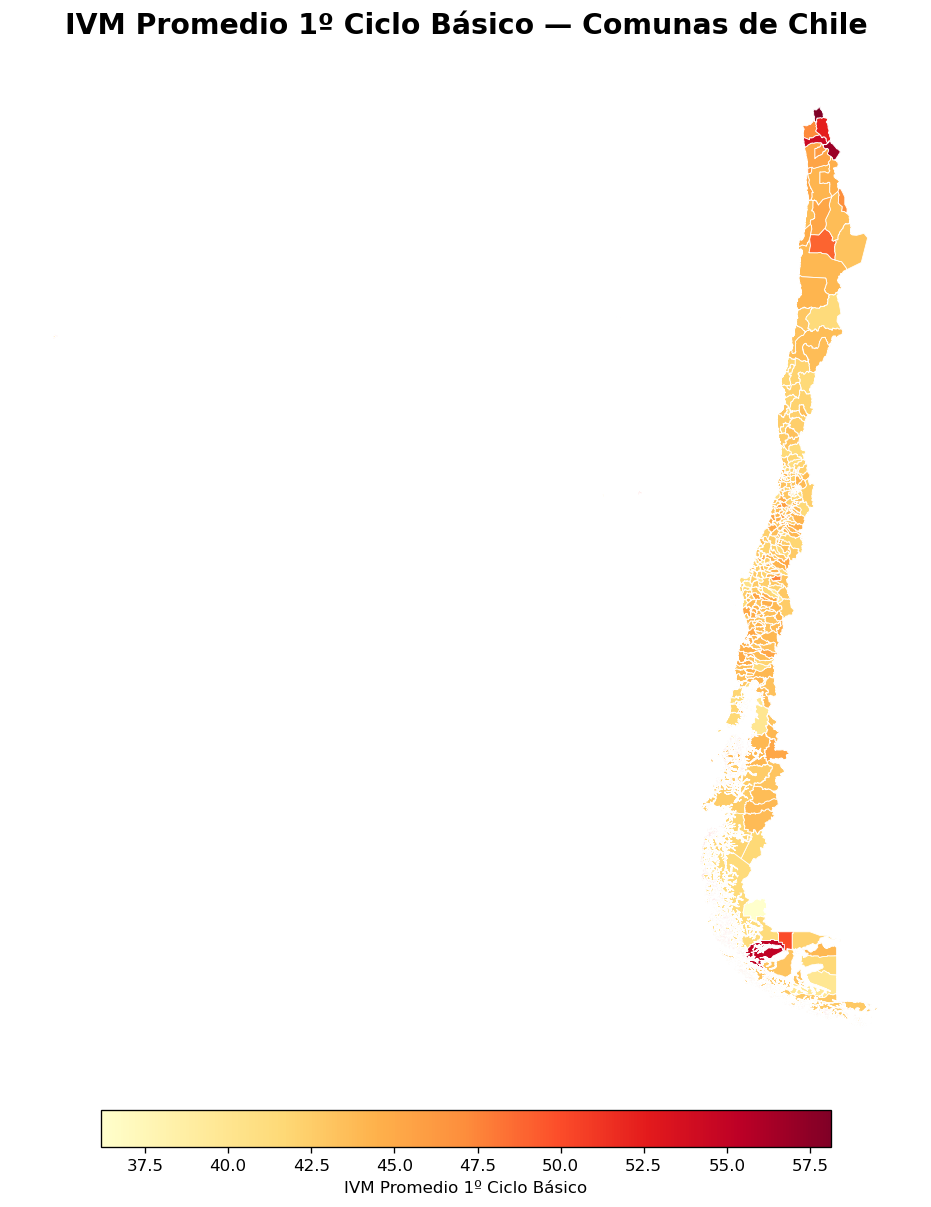

In [120]:

# Crear figura y ejes con proporción más equilibrada
fig, ax = plt.subplots(figsize=(9, 11), dpi=120)

# Dibujar el mapa con los mismos parámetros funcionales
agg_comunal.plot(
    column='IVM Promedio 1º Ciclo Básico',
    ax=ax,
    cmap='YlOrRd',
    legend=True,
    legend_kwds={
        'label': "IVM Promedio 1º Ciclo Básico",
        'orientation': "horizontal",
        'shrink': 0.7,
        'pad': 0.03
    },
    missing_kwds={
        "color": "lightgrey",
        "label": "Sin datos"
    },
    edgecolor="white",
    linewidth=0.5
)

# Título con estilo mejorado
ax.set_title(
    "IVM Promedio 1º Ciclo Básico — Comunas de Chile",
    fontsize=17,
    fontweight='bold',
    pad=16
)

# Quitar ejes y marcos
ax.set_axis_off()

# Ajustar márgenes y mostrar
plt.tight_layout()
plt.show()

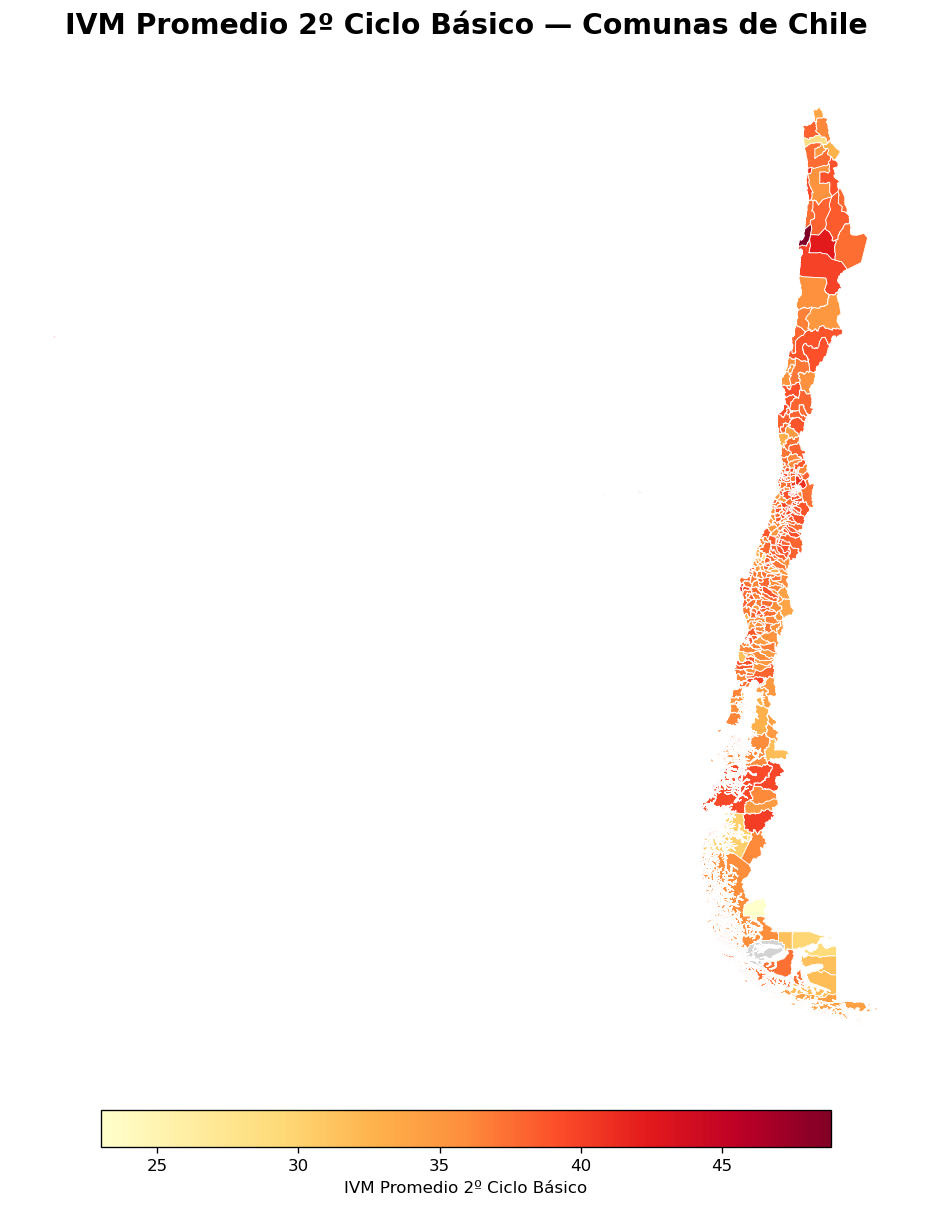

In [121]:

# Crear figura y ejes con proporción más equilibrada
fig, ax = plt.subplots(figsize=(9, 11), dpi=120)

# Dibujar el mapa con los mismos parámetros funcionales
agg_comunal.plot(
    column='IVM Promedio 2º Ciclo Básico',
    ax=ax,
    cmap='YlOrRd',
    legend=True,
    legend_kwds={
        'label': "IVM Promedio 2º Ciclo Básico",
        'orientation': "horizontal",
        'shrink': 0.7,
        'pad': 0.03
    },
    missing_kwds={
        "color": "lightgrey",
        "label": "Sin datos"
    },
    edgecolor="white",
    linewidth=0.5
)

# Título con estilo mejorado
ax.set_title(
    "IVM Promedio 2º Ciclo Básico — Comunas de Chile",
    fontsize=17,
    fontweight='bold',
    pad=16
)

# Quitar ejes y marcos
ax.set_axis_off()

# Ajustar márgenes y mostrar
plt.tight_layout()
plt.show()

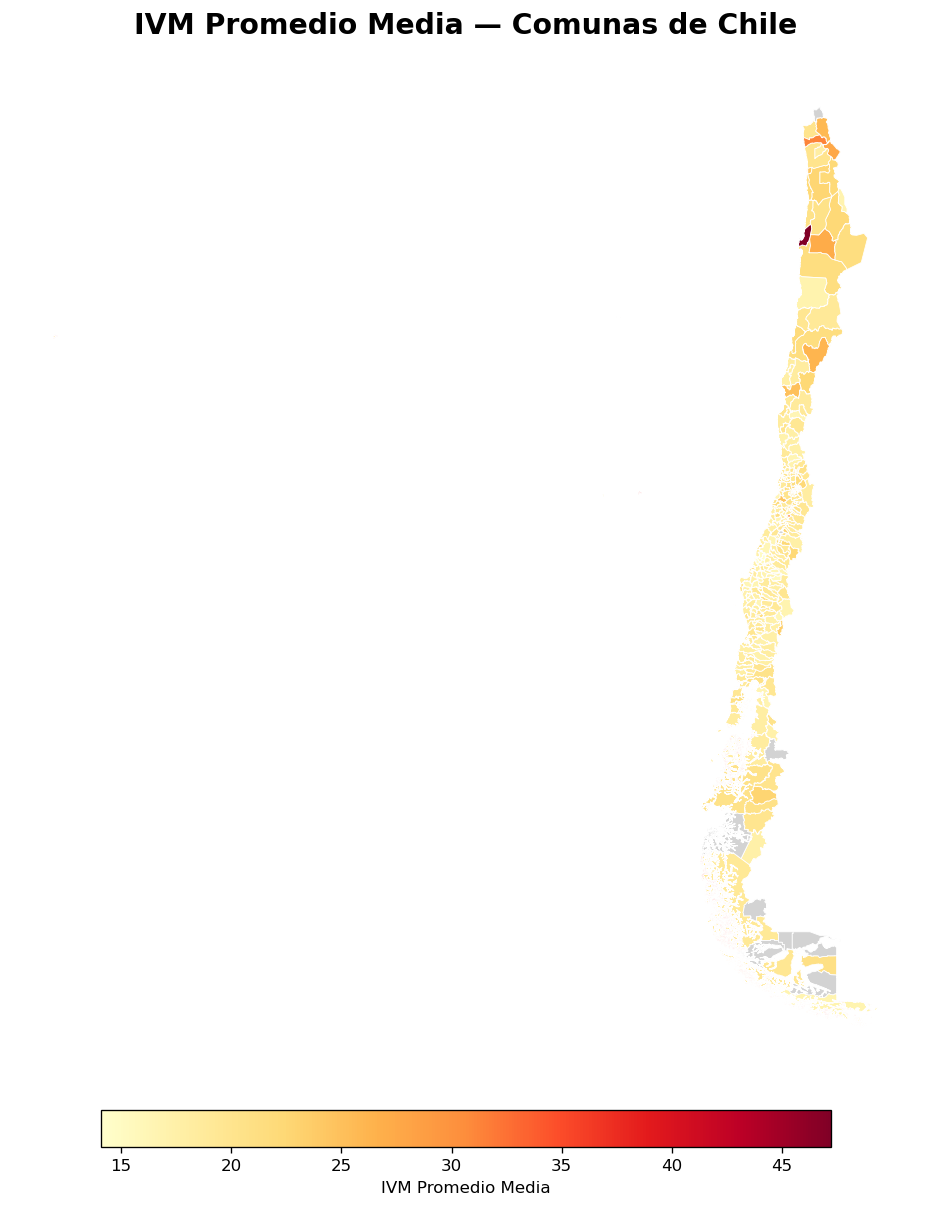

In [122]:


# Crear figura y ejes con proporción más equilibrada
fig, ax = plt.subplots(figsize=(9, 11), dpi=120)

# Dibujar el mapa con los mismos parámetros funcionales
agg_comunal.plot(
    column='IVM Promedio Media',
    ax=ax,
    cmap='YlOrRd',
    legend=True,
    legend_kwds={
        'label': "IVM Promedio Media",
        'orientation': "horizontal",
        'shrink': 0.7,
        'pad': 0.03
    },
    missing_kwds={
        "color": "lightgrey",
        "label": "Sin datos"
    },
    edgecolor="white",
    linewidth=0.5
)

# Título con estilo mejorado
ax.set_title(
    "IVM Promedio Media — Comunas de Chile",
    fontsize=17,
    fontweight='bold',
    pad=16
)

# Quitar ejes y marcos
ax.set_axis_off()

# Ajustar márgenes y mostrar
plt.tight_layout()
plt.show()

#Respuesta 

La vulnerabilidad varía bastante según el nivel de enseñanza y la zona del país. En el mapa de Parvularia se observa que las comunas del norte y parte del sur presentan los valores más altos de IVM, lo que indica una mayor vulnerabilidad en comparación con el centro del país, donde los valores son más bajos. En cambio, en el nivel de 1° Ciclo Básico los niveles de vulnerabilidad son más equilibrados, aunque sigue destacando el norte con colores más intensos. En el 2° Ciclo Básico la vulnerabilidad vuelve a aumentar en varias comunas del centro-sur y del norte, mostrando una mayor dispersión territorial. Finalmente, en el nivel Medio los valores son en general más bajos, lo que sugiere una menor vulnerabilidad promedio, aunque algunas comunas del norte aún se mantienen con índices altos. En general, se aprecia una tendencia de q las comunas del norte y del extremo sur tienden a ser más vulnerables en todos los niveles


# <h1><center>  6.2 Relación entre ruralidad comunal y vulnerabilidad (0.7 pts)  </center></h1>
 

En la sección **5.2** definimos el **porcentaje de ruralidad** de cada comuna según la cantidad de establecimientos rurales en cada una. Analice y visualice los datos en `agg_comunal` para responder la siguiente pregunta:

* ¿Hay alguna correlación entre el IVM promedio y el porcentaje de ruralidad en las comunas de Chile?

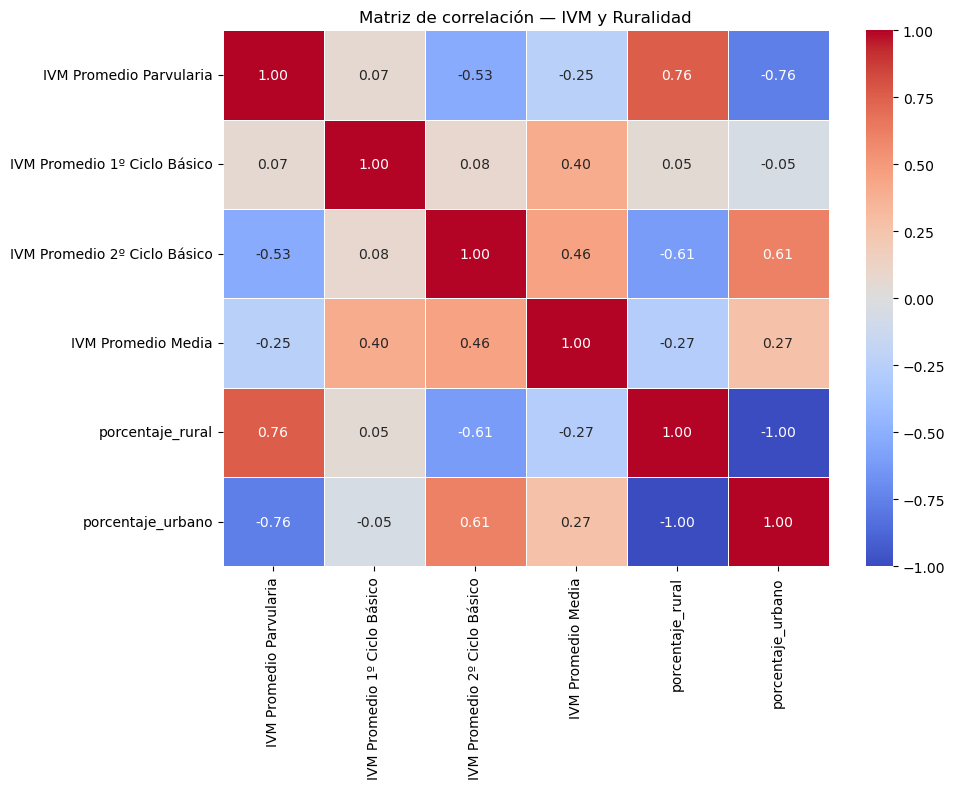

In [ ]:
import seaborn as sns
gdf = agg_comunal.copy()

columnas = [
    'IVM Promedio Parvularia',
    'IVM Promedio 1º Ciclo Básico',
    'IVM Promedio 2º Ciclo Básico',
    'IVM Promedio Media',
    'porcentaje_rural',
    'porcentaje_urbano'
]

corr = gdf[columnas].corr().round(2)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            fmt='.2f', linewidths=0.5)
plt.title('Matriz de correlación — IVM y Ruralidad')
plt.tight_layout()
plt.show()

El IVM Promedio Parvularia tiene una correlación positiva alta con el porcentaje rural (0.77) y negativa fuerte con el porcentaje urbano (-0.77), lo que indica que la vulnerabilidad en este nivel aumenta en comunas más rurales y disminuye en zonas urbanas. En cambio, los niveles de 1° Ciclo Básico y Media muestran correlaciones más bajas tanto con ruralidad como con urbanidad, lo que sugiere que en esos niveles la vulnerabilidad no depende tanto del tipo de territorio. El 2° Ciclo Básico presenta una correlación moderadamente negativa con ruralidad (-0.61) y positiva con urbanidad (0.61), lo que implica que la vulnerabilidad tiende a ser mayor en comunas más urbanas en este nivel, a diferencia de Parvularia. Entre los distintos niveles de IVM también se aprecian relaciones mixtas: por ejemplo, Parvularia y 2° Ciclo Básico tienen una correlación negativa (-0.54), lo que sugiere que las comunas con alta vulnerabilidad en educación inicial no necesariamente la mantienen en niveles más avanzados. En resumen, la ruralidad se asocia con mayor vulnerabilidad en los niveles iniciales, mientras que en niveles más altos (como 2° Ciclo y Media) la relación puede invertirse o debilitarse, indicando dinámicas distintas según el contexto educativo y territorial.